<a href="https://colab.research.google.com/github/nachospimp/pf/blob/main/IPC_Momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
ipc_df = pd.read_html('https://es.wikipedia.org/wiki/%C3%8Dndice_de_Precios_y_Cotizaciones#:~:text=El%20S%26P%2FBMV%20%C3%8Dndice%20de,la%20Bolsa%20Mexicana%20de%20Valores.')[0]

In [ ]:
ipc_df.head()

Símbolo                      Nombre  \
0        AMX L[2]​               América Móvil   
1     WALMEX V[2]​                      Walmex   
2    FEMSA UBD[2]​  Fomento Económico Mexicano   
3  TLEVISA CPO[2]​              Grupo Televisa   
4    GMEXICO B[2]​                Grupo México   

                           Sector Peso en el indicador  
0  Servicio de Telecomunicaciones              16.63 %  
1  Productos de Consumo Frecuente               7.03 %  
2  Productos de Consumo Frecuente              11.28 %  
3  Servicio de Telecomunicaciones               9.08 %  
4                      Materiales               7.08 %

In [ ]:
tickers = ipc_df.Símbolo.to_list()

In [ ]:
# Limpiar y transformar los tickers
clean_tickers_list = []
for ticker in tickers:
    # Usar regex para eliminar '[n]\u200b' y espacios
    cleaned_ticker = re.sub(r'\s*\[\d+\]\u200b', '', ticker)
    cleaned_ticker = cleaned_ticker.replace(' ', '')  # Eliminar espacios

    clean_tickers_list.append(cleaned_ticker)

In [ ]:
# Paso 2: Realizar ajustes específicos
final_tickers_list = []
for ticker in clean_tickers_list:
    if ticker == "WALMEXV":
        ticker = "WALMEX"  # Eliminar la V final para WALMEXV.MX
    if ticker == "AMXL":
        ticker = "AMXB.MX"  # Eliminar la V final para WALMEXV.MX

    else:
        ticker += '.MX'  # Agregar '.MX' a otros tickers

    final_tickers_list.append(ticker)


In [ ]:
# Paso 3: Agregar manualmente algunos tickers adicionales
additional_tickers = ['RA.MX', 'BBAJIOO.MX', 'MEGACPO.MX', 'ORBIA.MX', 'GENTERA.MX', 'CUERVO.MX', 'VESTA.MX', 'KIMBERA.MX', 'GCC.MX', 'Q.MX', 'CHDRAUIB.MX', 'KOFUBL.MX', 'OMAB.MX', 'MEGACPO.MX']  # Agregar más tickers aquí
final_tickers_list.extend(additional_tickers)


In [ ]:
final_tickers_list

['AMXB.MX',
 'WALMEX.MX',
 'FEMSAUBD.MX',
 'TLEVISACPO.MX',
 'GMEXICOB.MX',
 'GFNORTEO.MX',
 'CEMEXCPO.MX',
 'ALFAA.MX',
 'PE&OLES.MX',
 'GFINBURO.MX',
 'KOFL.MX',
 'ELEKTRA.MX',
 'MEXCHEM.MX',
 'BIMBOA.MX',
 'AC.MX',
 'KIMBER.MX',
 'LABB.MX',
 'LIVEPOLC-1.MX',
 'ASURB.MX',
 'GAPB.MX',
 'COMPARC.MX',
 'ALPEKA.MX',
 'ICA.MX',
 'ICHB.MX',
 'BOLSAA.MX',
 'AZTECACPO.MX',
 'OHLMEX.MX',
 'GRUMAB.MX',
 'ALSEA.MX',
 'GCARSOA1.MX',
 'LALAB.MX',
 'GFREGIOO.MX',
 'COMERCI.MX',
 'IENOVA.MX',
 'PINFRA.MX',
 'SANMEX.MX',
 'RA.MX',
 'BBAJIOO.MX',
 'MEGACPO.MX',
 'ORBIA.MX',
 'GENTERA.MX',
 'CUERVO.MX',
 'VESTA.MX',
 'KIMBERA.MX',
 'GCC.MX',
 'Q.MX',
 'CHDRAUIB.MX',
 'KOFUBL.MX',
 'OMAB.MX',
 'MEGACPO.MX']

In [ ]:
# Download the data, including the 'Adj Close' column as a named column within the dataframe
df = yf.download(final_tickers_list,  start='2022-01-01')

[*********************100%***********************]  49 of 49 completed
ERROR:yfinance:
10 Failed downloads:
ERROR:yfinance:['LALAB.MX', 'KOFL.MX', 'MEXCHEM.MX', 'KIMBER.MX', 'COMERCI.MX', 'IENOVA.MX', 'SANMEX.MX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
ERROR:yfinance:['OHLMEX.MX', 'COMPARC.MX', 'GFREGIOO.MX']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2022-01-01 -> 2024-09-15)')


In [ ]:
df

Price                       Adj Close                                   \
Ticker                          AC.MX   ALFAA.MX  ALPEKA.MX   ALSEA.MX   
Date                                                                     
2022-01-03 00:00:00+00:00  114.781631  13.902499  22.162252  39.284531   
2022-01-04 00:00:00+00:00  116.880409  13.829806  21.993832  40.356640   
2022-01-05 00:00:00+00:00  115.880142  13.375476  21.795689  41.212364   
2022-01-06 00:00:00+00:00  114.978111  13.466342  21.498474  41.094334   
2022-01-07 00:00:00+00:00  114.683380  13.221004  21.458845  42.520535   
...                               ...        ...        ...        ...   
2024-09-09 00:00:00+00:00  179.119995  11.120000  12.390000  53.209999   
2024-09-10 00:00:00+00:00  177.880005  13.030000  12.850000  51.340000   
2024-09-11 00:00:00+00:00  178.300003  13.410000  13.360000  51.480000   
2024-09-12 00:00:00+00:00  178.899994  13.260000  13.300000  52.610001   
2024-09-13 00:00:00+00:00  179.990005  13.300000  13.700000  53.029999   

Price                                                                     \
Ticker                       AMXB.MX    ASURB.MX AZTECACPO.MX BBAJIOO.MX   
Date                                                                       
2022-01-03 00:00:00+00:00  18.978464  371.960022         1.13  26.831890   
2022-01-04 00:00:00+00:00  19.066736  373.405060         1.12  27.092596   
2022-01-05 00:00:00+00:00  19.066736  375.969147         1.10  26.796659   
2022-01-06 00:00:00+00:00  19.049084  382.886017         1.10  27.198292   
2022-01-07 00:00:00+00:00  18.616549  378.841614         1.15  27.649246   
...                              ...         ...          ...        ...   
2024-09-09 00:00:00+00:00  16.230000  519.520020         0.50  44.759998   
2024-09-10 00:00:00+00:00  15.690000  526.320007         0.50  44.049999   
2024-09-11 00:00:00+00:00  15.970000  529.710022         0.50  43.549999   
2024-09-12 00:00:00+00:00  16.190001  543.010010         0.50  44.799999   
2024-09-13 00:00:00+00:00  16.200001  540.789978         0.50  46.209999   

Price                                            ...   Volume            \
Ticker                     BIMBOA.MX  BOLSAA.MX  ...  OMAB.MX  ORBIA.MX   
Date                                             ...                      
2022-01-03 00:00:00+00:00  60.029411  32.513786  ...   172544    531609   
2022-01-04 00:00:00+00:00  60.452221  31.912607  ...   508126   1741097   
2022-01-05 00:00:00+00:00  58.607231  31.328129  ...   532552   1220393   
2022-01-06 00:00:00+00:00  61.201744  31.570274  ...   484609   2055954   
2022-01-07 00:00:00+00:00  61.960888  31.269684  ...  1506973   2755985   
...                              ...        ...  ...      ...       ...   
2024-09-09 00:00:00+00:00  69.099998  30.240000  ...   877191   2746387   
2024-09-10 00:00:00+00:00  68.269997  30.900000  ...   730857  10809922   
2024-09-11 00:00:00+00:00  67.989998  31.299999  ...   910342   6501862   
2024-09-12 00:00:00+00:00  69.339996  30.870001  ...   417566   7673680   
2024-09-13 00:00:00+00:00  68.680000  30.790001  ...  1664343   4391625   

Price                                                                       \
Ticker                    PE&OLES.MX PINFRA.MX     Q.MX    RA.MX SANMEX.MX   
Date                                                                         
2022-01-03 00:00:00+00:00      46245    166870   469947   257954       NaN   
2022-01-04 00:00:00+00:00     164046    272970  1196728   514422       NaN   
2022-01-05 00:00:00+00:00     153996    285414  1222633  1961928       NaN   
2022-01-06 00:00:00+00:00     355960   2582310  1139318   227534       NaN   
2022-01-07 00:00:00+00:00     232089    321181  1271434   308055       NaN   
...                              ...       ...      ...      ...       ...   
2024-09-09 00:00:00+00:00     211305    225487   865314  1157480       NaN   
2024-09-10 00:00:00+00:00     301577    276883  1167947  1691411   

In [ ]:
df = df.dropna(axis=1)

In [ ]:
# Extraer solo la columna 'Adj Close' y 'Volume' para el análisis
adj_close_df = df['Adj Close']  # DataFrame con los precios ajustados
volume_df = df['Volume']        # DataFrame con el volumen de cada ticker

In [ ]:
adj_close_df

Ticker                          AC.MX   ALFAA.MX  ALPEKA.MX   ALSEA.MX  \
Date                                                                     
2022-01-03 00:00:00+00:00  114.781631  13.902499  22.162252  39.284531   
2022-01-04 00:00:00+00:00  116.880409  13.829806  21.993832  40.356640   
2022-01-05 00:00:00+00:00  115.880142  13.375476  21.795689  41.212364   
2022-01-06 00:00:00+00:00  114.978111  13.466342  21.498474  41.094334   
2022-01-07 00:00:00+00:00  114.683380  13.221004  21.458845  42.520535   
...                               ...        ...        ...        ...   
2024-09-09 00:00:00+00:00  179.119995  11.120000  12.390000  53.209999   
2024-09-10 00:00:00+00:00  177.880005  13.030000  12.850000  51.340000   
2024-09-11 00:00:00+00:00  178.300003  13.410000  13.360000  51.480000   
2024-09-12 00:00:00+00:00  178.899994  13.260000  13.300000  52.610001   
2024-09-13 00:00:00+00:00  179.990005  13.300000  13.700000  53.029999   

Ticker                       AMXB.MX    ASURB.MX  AZTECACPO.MX  BBAJIOO.MX  \
Date                                                                         
2022-01-03 00:00:00+00:00  18.978464  371.960022          1.13   26.831890   
2022-01-04 00:00:00+00:00  19.066736  373.405060          1.12   27.092596   
2022-01-05 00:00:00+00:00  19.066736  375.969147          1.10   26.796659   
2022-01-06 00:00:00+00:00  19.049084  382.886017          1.10   27.198292   
2022-01-07 00:00:00+00:00  18.616549  378.841614          1.15   27.649246   
...                              ...         ...           ...         ...   
2024-09-09 00:00:00+00:00  16.230000  519.520020          0.50   44.759998   
2024-09-10 00:00:00+00:00  15.690000  526.320007          0.50   44.049999   
2024-09-11 00:00:00+00:00  15.970000  529.710022          0.50   43.549999   
2024-09-12 00:00:00+00:00  16.190001  543.010010          0.50   44.799999   
2024-09-13 00:00:00+00:00  16.200001  540.789978          0.50   46.209999   

Ticker                     BIMBOA.MX  BOLSAA.MX  ...  MEGACPO.MX     OMAB.MX  \
Date                                             ...                           
2022-01-03 00:00:00+00:00  60.029411  32.513786  ...   56.249062  103.854744   
2022-01-04 00:00:00+00:00  60.452221  31.912607  ...   56.055653  103.368805   
2022-01-05 00:00:00+00:00  58.607231  31.328129  ...   56.215424  104.029388   
2022-01-06 00:00:00+00:00  61.201744  31.570274  ...   55.551094  104.173645   
2022-01-07 00:00:00+00:00  61.960888  31.269684  ...   55.366093  106.443893   
...                              ...        ...  ...         ...         ...   
2024-09-09 00:00:00+00:00  69.099998  30.240000  ...   42.049999  164.949997   
2024-09-10 00:00:00+00:00  68.269997  30.900000  ...   41.189999  165.929993   
2024-09-11 00:00:00+00:00  67.989998  31.299999  ...   40.889999  164.990005   
2024-09-12 00:00:00+00:00  69.339996  30.870001  ...   40.200001  168.679993   
2024-09-13 00:00:00+00:00  68.680000  30.790001  ...   40.410000  172.389999   

Ticker                      ORBIA.MX  PE&OLES.MX   PINFRA.MX        Q.MX  \
Date                                                                       
2022-01-03 00:00:00+00:00  51.267269  233.479996  143.566589   89.433678   
2022-01-04 00:00:00+00:00  50.992546  230.320007  143.700943   90.168159   
2022-01-05 00:00:00+00:00  50.001534  231.059998  144.211441   89.701546   
2022-01-06 00:00:00+00:00  48.882980  226.800003  142.751572   91.498871   
2022-01-07 00:00:00+00:00  48.019527  229.389999  141.685806   91.351967   
...                              ...         ...         ...         ...   
2024-09-09 00:00:00+00:00  19.040001  233.070007  174.679993  151.770004   
2024-09-10 00:00:00+00:00  19.639999  237.979996  174.330002  151.809998   
2024-09-11 00:00:00+00:00  19.469999  236.050003  180.000000  152.729996   
2024-09-12 00:00:00+00:00  20.299999  240.880005  185.270004  156.750000   
2024-09-13 00:00:00+00:00  19.730000  249.149994  178.509995  159.759

In [ ]:
volume_df

Ticker                       AC.MX  ALFAA.MX  ALPEKA.MX  ALSEA.MX   AMXB.MX  \
Date                                                                          
2022-01-03 00:00:00+00:00  1367743   4440892     891326   2741261      2447   
2022-01-04 00:00:00+00:00  3258583   4106290     492720   3613262      2838   
2022-01-05 00:00:00+00:00  3195459   5003882    1216527   7330254         0   
2022-01-06 00:00:00+00:00  2227351   5097277    1160728   1244563      3260   
2022-01-07 00:00:00+00:00  3632781   7780247     309218   2930105      4154   
...                            ...       ...        ...       ...       ...   
2024-09-09 00:00:00+00:00   907068   3768999     545299    956579  44840759   
2024-09-10 00:00:00+00:00   967304  44096872    1125161   1393519  66214941   
2024-09-11 00:00:00+00:00  1042123  24608071     738377    920085  64543169   
2024-09-12 00:00:00+00:00  1505645  13904174     666001    672215  79915159   
2024-09-13 00:00:00+00:00  1071716   6157605     751814    877076  47652236   

Ticker                     ASURB.MX  AZTECACPO.MX  BBAJIOO.MX  BIMBOA.MX  \
Date                                                                       
2022-01-03 00:00:00+00:00     63152        102908     1668217     543738   
2022-01-04 00:00:00+00:00    427274        164015     1072058    1220353   
2022-01-05 00:00:00+00:00    195694        682063      378348    1492518   
2022-01-06 00:00:00+00:00    294896        354179     2860516    2454987   
2022-01-07 00:00:00+00:00    167650        370530     1241407    1833800   
...                             ...           ...         ...        ...   
2024-09-09 00:00:00+00:00    322067             0     1887196     831876   
2024-09-10 00:00:00+00:00    542403             0     1526828    1287842   
2024-09-11 00:00:00+00:00    294426             0     3040144    1197340   
2024-09-12 00:00:00+00:00    211372             0     2777399    1685828   
2024-09-13 00:00:00+00:00    168225             0     1314892     546661   

Ticker                     BOLSAA.MX  ...  MEGACPO.MX  OMAB.MX  ORBIA.MX  \
Date                                  ...                                  
2022-01-03 00:00:00+00:00    1089100  ...      182045   172544    531609   
2022-01-04 00:00:00+00:00     659836  ...     2704964   508126   1741097   
2022-01-05 00:00:00+00:00    3140792  ...      353123   532552   1220393   
2022-01-06 00:00:00+00:00     677741  ...      498795   484609   2055954   
2022-01-07 00:00:00+00:00     222050  ...      958765  1506973   2755985   
...                              ...  ...         ...      ...       ...   
2024-09-09 00:00:00+00:00     568909  ...      436567   877191   2746387   
2024-09-10 00:00:00+00:00     992715  ...      488330   730857  10809922   
2024-09-11 00:00:00+00:00    1354201  ...      468824   910342   6501862   
2024-09-12 00:00:00+00:00    1180556  ...      540721   417566   7673680   
2024-09-13 00:00:00+00:00     365598  ...      331497  1664343   4391625   

Ticker                     PE&OLES.MX  PINFRA.MX     Q.MX    RA.MX  \
Date                                                                 
2022-01-03 00:00:00+00:00       46245     166870   469947   257954   
2022-01-04 00:00:00+00:00      164046     272970  1196728   514422   
2022-01-05 00:00:00+00:00      153996     285414  1222633  1961928   
2022-01-06 00:00:00+00:00      355960    2582310  1139318   227534   
2022-01-07 00:00:00+00:00      232089     321181  1271434   308055   
...                               ...        ...      ...      ...   
2024-09-09 00:00:00+00:00      211305     225487   865314  1157480   
2024-09-10 00:00:00+00:00      301577     276883  1167947  1691411   
2024-09-11 00:00:00+00:00      326981     225036   987603  1944851   
2024-09-12 00:00:00+00:00      233615     191184   557182   984859   
2024-09-13 00:00:00+00:00      286355     172395   477522  1040093   

Ticker                     TLEVISACPO.MX  VESTA.MX  WALMEX.MX  
Date               

1. Rendimiento Medio Diario y Volatilidad Diaria
Rendimiento Medio Diario:

    Cálculo: El rendimiento medio diario es simplemente el promedio de los rendimientos diarios a lo largo del tiempo. Se calcula sumando todos los rendimientos diarios y dividiendo por el número de días.
    Rendimiento Medio Diario=1N∑t=1NRt
    Rendimiento Medio Diario=N1​t=1∑N​Rt​

    Donde RtRt​ es el rendimiento en el día tt.

    Interpretación: El rendimiento medio diario nos da una idea del rendimiento esperado por día. Un valor positivo sugiere que, en promedio, el activo tiene una tendencia alcista diaria, mientras que un valor negativo indica una tendencia bajista.

Volatilidad Diaria:

    Cálculo: La volatilidad diaria se mide como la desviación estándar de los rendimientos diarios. Se calcula como la raíz cuadrada de la varianza de los rendimientos diarios.
    Volatilidad Diaria=1N−1∑t=1N(Rt−Rendimiento Medio Diario)2
    Volatilidad Diaria=N−11​t=1∑N​(Rt​−Rendimiento Medio Diario)2

    ​

    Interpretación: La volatilidad mide el nivel de riesgo asociado a los rendimientos. Cuanto mayor sea la volatilidad, más riesgo tiene el activo, ya que su precio fluctúa más. Activos con baja volatilidad son más estables.

2. Volumen Promedio y Tendencias de Volumen
Volumen Promedio:

    Cálculo: El volumen promedio es simplemente la media del volumen diario a lo largo del tiempo.
    Volumen Promedio=1N∑t=1NVt
    Volumen Promedio=N1​t=1∑N​Vt​

    Donde VtVt​ es el volumen en el día tt.

    Interpretación: Un volumen promedio más alto indica que el activo es más líquido, es decir, tiene más participantes en el mercado, lo que suele ser favorable para los traders. Activos con bajo volumen pueden ser más difíciles de comprar o vender sin afectar significativamente su precio.

Comparación del Volumen Actual con el Promedio:

    Interpretación: Si el volumen actual está por encima del volumen promedio, esto puede indicar un aumento en el interés del mercado por el activo, posiblemente debido a noticias o eventos. Si está por debajo del promedio, puede significar falta de interés o actividad en el activo.

3. Matriz de Correlación
Cálculo:

    Correlación de Pearson: La matriz de correlación se calcula usando el coeficiente de correlación de Pearson. Esto mide la relación lineal entre dos series de tiempo (rendimientos). Se expresa como un valor entre -1 y 1.
    ρxy=Cov(X,Y)σXσY
    ρxy​=σX​σY​Cov(X,Y)​

    Interpretación:
        Correlación fuerte positiva (cerca de 1): Los activos tienden a moverse en la misma dirección. Por ejemplo, si dos activos tienen una correlación de 0.9, cuando uno sube, el otro también lo hará en la mayoría de los casos.
        Correlación fuerte negativa (cerca de -1): Los activos se mueven en direcciones opuestas. Una correlación de -0.9 implica que cuando un activo sube, el otro generalmente baja.
        Correlación cercana a 0: No hay relación lineal clara entre los activos.

Visualización con Mapa de Calor:

    Interpretación del Mapa de Calor: Los colores en el mapa de calor permiten identificar rápidamente correlaciones fuertes y débiles. Colores rojos pueden representar correlaciones negativas, mientras que colores azules pueden representar correlaciones positivas. Esto facilita la detección visual de relaciones clave entre activos.

4. Rendimientos Logarítmicos y Volatilidad Logarítmica
Rendimientos Logarítmicos:

    Cálculo: Se calcula como el logaritmo natural del cociente entre el precio ajustado del día actual y el precio ajustado del día anterior.
    Rtlog=ln⁡(PtPt−1)
    Rtlog​=ln(Pt−1​Pt​​)

    Interpretación: Los rendimientos logarítmicos son útiles porque son aditivos a lo largo del tiempo, lo que permite sumar rendimientos logarítmicos para obtener el rendimiento acumulado durante un periodo de tiempo. Son preferidos en análisis de series de tiempo porque se distribuyen más normalmente que los rendimientos simples.

Volatilidad Logarítmica:

    Cálculo: Se calcula de la misma manera que la volatilidad de los rendimientos simples, pero usando rendimientos logarítmicos.
    Volatilidad Logarıˊtmica=Desviacioˊn Estaˊndar de los Rendimientos Logarıˊtmicos
    Volatilidad Logarıˊtmica=Desviacioˊn Estaˊndar de los Rendimientos Logarıˊtmicos

    Interpretación: La volatilidad logarítmica representa la variabilidad de los rendimientos logarítmicos. Si la volatilidad logarítmica es alta, significa que los precios de los activos fluctúan ampliamente y, por lo tanto, hay un mayor riesgo. Similar a la volatilidad diaria, una alta volatilidad logarítmica indica mayor incertidumbre en los retornos.

Conclusiones de las Cuatro Bases de Datos

Al profundizar en estos análisis, podemos:

    Rendimientos: Evaluar el rendimiento medio para conocer la tendencia general del activo y su volatilidad para entender el riesgo.
    Volumen: Medir la liquidez del activo y detectar posibles cambios de interés en el mercado a través de la comparación del volumen actual con el promedio.
    Correlaciones: Identificar relaciones entre activos para construir carteras diversificadas, aprovechar oportunidades de cobertura o co-integración.
    Rendimientos Logarítmicos: Usar la suma de rendimientos logarítmicos para modelar estrategias de inversión y analizar el riesgo de una manera más robusta.

In [ ]:
# Calcular los rendimientos diarios a partir de los precios ajustados
returns_df = adj_close_df.pct_change()

# Mostrar las primeras filas de los rendimientos
print(returns_df.tail())

Ticker                        AC.MX  ALFAA.MX  ALPEKA.MX  ALSEA.MX   AMXB.MX  \
Date                                                                           
2024-09-09 00:00:00+00:00 -0.000056 -0.004476  -0.001612  0.024057  0.003090   
2024-09-10 00:00:00+00:00 -0.006923  0.171763   0.037127 -0.035144 -0.033272   
2024-09-11 00:00:00+00:00  0.002361  0.029163   0.039689  0.002727  0.017846   
2024-09-12 00:00:00+00:00  0.003365 -0.011186  -0.004491  0.021950  0.013776   
2024-09-13 00:00:00+00:00  0.006093  0.003017   0.030075  0.007983  0.000618   

Ticker                     ASURB.MX  AZTECACPO.MX  BBAJIOO.MX  BIMBOA.MX  \
Date                                                                       
2024-09-09 00:00:00+00:00  0.006705           0.0    0.002015  -0.001301   
2024-09-10 00:00:00+00:00  0.013089           0.0   -0.015862  -0.012012   
2024-09-11 00:00:00+00:00  0.006441           0.0   -0.011351  -0.004101   
2024-09-12 00:00:00+00:00  0.025108           0.0    0.0287

In [ ]:
# Iterar sobre cada uno de los últimos 5 días y encontrar el activo con mayor rendimiento. Porcentual
for date, row in returns_df.tail(5).iterrows():
    top_performing_ticker = row.idxmax()
    top_performing_value = row.max()
    print(f"El {date.date()}, el activo que ganó más fue: {top_performing_ticker} con un rendimiento de {top_performing_value:.4f}")

El 2024-09-09, el activo que ganó más fue: OMAB.MX con un rendimiento de 0.0379
El 2024-09-10, el activo que ganó más fue: ALFAA.MX con un rendimiento de 0.1718
El 2024-09-11, el activo que ganó más fue: GENTERA.MX con un rendimiento de 0.0554
El 2024-09-12, el activo que ganó más fue: ORBIA.MX con un rendimiento de 0.0426
El 2024-09-13, el activo que ganó más fue: PE&OLES.MX con un rendimiento de 0.0343


In [ ]:
# Calcular las ganancias/pérdidas diarias en cifras absolutas
absolute_returns_df = returns_df * adj_close_df.shift(1)

# Iterar sobre cada uno de los últimos 5 días y encontrar el activo con mayor ganancia en cifras absolutas
for date, row in absolute_returns_df.tail(5).iterrows():
    top_performing_ticker = row.idxmax()
    top_performing_value = row.max()
    print(f"El {date.date()}, el activo que más ganó fue: {top_performing_ticker} con una ganancia de ${top_performing_value:.2f} MXN")

El 2024-09-09, el activo que más ganó fue: OMAB.MX con una ganancia de $6.03 MXN
El 2024-09-10, el activo que más ganó fue: ASURB.MX con una ganancia de $6.80 MXN
El 2024-09-11, el activo que más ganó fue: PINFRA.MX con una ganancia de $5.67 MXN
El 2024-09-12, el activo que más ganó fue: ASURB.MX con una ganancia de $13.30 MXN
El 2024-09-13, el activo que más ganó fue: PE&OLES.MX con una ganancia de $8.27 MXN


In [ ]:
# Calcular las ganancias/pérdidas diarias en cifras absolutas
absolute_returns_df = returns_df * adj_close_df.shift(1)

# Sumar los rendimientos acumulados (en porcentajes) de los últimos 5 días
last_5_days_returns = returns_df.tail(5).sum()

# Sumar las ganancias acumuladas (en cifras absolutas) de los últimos 5 días
last_5_days_absolute_gains = absolute_returns_df.tail(5).sum()

# Identificar el activo con el mayor rendimiento acumulado en los últimos 5 días (en porcentajes)
top_performing_ticker_pct = last_5_days_returns.idxmax()
top_performing_value_pct = last_5_days_returns.max()

# Identificar el activo con la mayor ganancia acumulada en los últimos 5 días (en cifras absolutas)
top_performing_ticker_abs = last_5_days_absolute_gains.idxmax()
top_performing_value_abs = last_5_days_absolute_gains.max()

# Mostrar los resultados
print(f"El activo con el mayor rendimiento acumulado en los últimos 5 días es: {top_performing_ticker_pct} con un rendimiento de {top_performing_value_pct:.4f} %")
print(f"El activo con la mayor ganancia acumulada en los últimos 5 días es: {top_performing_ticker_abs} con una ganancia de ${top_performing_value_abs:.2f} MXN")

El activo con el mayor rendimiento acumulado en los últimos 5 días es: ALFAA.MX con un rendimiento de 0.1883 %
El activo con la mayor ganancia acumulada en los últimos 5 días es: ASURB.MX con una ganancia de $24.73 MXN


In [ ]:
# Filtrar los últimos 5 días de datos
last_5_days = adj_close_df.tail(5)

# Calcular los rendimientos porcentuales para los últimos 5 días
returns_last_5_days = last_5_days.pct_change()

# Calcular las diferencias absolutas para los últimos 5 días
absolute_returns_last_5_days = last_5_days.diff()

# Calcular rendimientos porcentuales promedio diario para los últimos 5 días
daily_avg_return_pct_last_5 = returns_last_5_days.mean()

# Calcular ganancias absolutas promedio diaria para los últimos 5 días
daily_avg_absolute_return_last_5 = absolute_returns_last_5_days.mean()

# Mostrar los resultados
print("Top 5 Rendimiento Promedio Diario por Ticker (Porcentual) en los Últimos 5 Días:")
print(daily_avg_return_pct_last_5.nlargest(5))

print("\nTop 5 Ganancia Promedio Diaria por Ticker (Absoluto) MXN en los Últimos 5 Días:")
print(daily_avg_absolute_return_last_5.nlargest(5))

# Formato para resultados absolutos
def format_currency(x):
    if x > 0:
        return f"${x:,.2f} MXN"  # Ganancia
    else:
        return f"-${abs(x):,.2f} MXN"  # Pérdida

print("\nGanancia/Pérdida Promedio Diaria Formateada (Absoluto) en los Últimos 5 Días:")
print(daily_avg_absolute_return_last_5.apply(format_currency))

Top 5 Rendimiento Promedio Diario por Ticker (Porcentual) en los Últimos 5 Días:
Ticker
ALFAA.MX         0.048189
ALPEKA.MX        0.025600
LABB.MX          0.019760
PE&OLES.MX       0.016938
LIVEPOLC-1.MX    0.014481
dtype: float64

Top 5 Ganancia Promedio Diaria por Ticker (Absoluto) MXN en los Últimos 5 Días:
Ticker
ASURB.MX       5.317490
PE&OLES.MX     4.019997
Q.MX           1.997498
OMAB.MX        1.860001
GFNORTEO.MX    1.814999
dtype: float64

Ganancia/Pérdida Promedio Diaria Formateada (Absoluto) en los Últimos 5 Días:
Ticker
AC.MX             $0.22 MXN
ALFAA.MX          $0.55 MXN
ALPEKA.MX         $0.33 MXN
ALSEA.MX         -$0.05 MXN
AMXB.MX          -$0.01 MXN
ASURB.MX          $5.32 MXN
AZTECACPO.MX     -$0.00 MXN
BBAJIOO.MX        $0.36 MXN
BIMBOA.MX        -$0.10 MXN
BOLSAA.MX         $0.14 MXN
CEMEXCPO.MX       $0.08 MXN
CHDRAUIB.MX       $0.51 MXN
CUERVO.MX         $0.18 MXN
ELEKTRA.MX       -$0.00 MXN
FEMSAUBD.MX      -$0.73 MXN
GAPB.MX          -$0.39 MXN
GCARSOA1.M

In [ ]:
# Función para calcular y mostrar resultados para un período específico
def calculate_momentum(period_days):
    # Filtrar los últimos period_days días de datos
    recent_data = adj_close_df.tail(period_days)

    # Calcular los rendimientos porcentuales para el período específico
    returns_recent = recent_data.pct_change()

    # Calcular las diferencias absolutas para el período específico
    absolute_returns_recent = recent_data.diff()

    # Calcular el rendimiento promedio diario
    daily_avg_return_pct_recent = returns_recent.mean()

    # Calcular la ganancia/pérdida promedio diaria
    daily_avg_absolute_return_recent = absolute_returns_recent.mean()

    # Mostrar resultados
    print(f"\nTop 5 Rendimiento Promedio Diario por Ticker en los Últimos {period_days} Días (Porcentual):")
    print(daily_avg_return_pct_recent.nlargest(5))

    print(f"\nTop 5 Ganancia Promedio Diaria por Ticker en los Últimos {period_days} Días (Absoluto):")
    print(daily_avg_absolute_return_recent.nlargest(5).apply(format_currency))

# Definir formato de moneda
def format_currency(x):
    if x > 0:
        return f"${x:,.2f} MXN"  # Ganancia
    else:
        return f"-${abs(x):,.2f} MXN"  # Pérdida

# Calcular y mostrar resultados para los últimos 15 y 30 días
calculate_momentum(15)
calculate_momentum(30)


Top 5 Rendimiento Promedio Diario por Ticker en los Últimos 15 Días (Porcentual):
Ticker
ALFAA.MX     0.011578
OMAB.MX      0.011217
ALPEKA.MX    0.009075
LABB.MX      0.006829
GAPB.MX      0.004838
dtype: float64

Top 5 Ganancia Promedio Diaria por Ticker en los Últimos 15 Días (Absoluto):
Ticker
OMAB.MX        $1.75 MXN
GAPB.MX        $1.44 MXN
ASURB.MX       $0.80 MXN
GFNORTEO.MX    $0.53 MXN
AC.MX          $0.35 MXN
dtype: object

Top 5 Rendimiento Promedio Diario por Ticker en los Últimos 30 Días (Porcentual):
Ticker
ALFAA.MX     0.009439
ALPEKA.MX    0.005778
LABB.MX      0.004946
GAPB.MX      0.004769
OMAB.MX      0.004633
dtype: float64

Top 5 Ganancia Promedio Diaria por Ticker en los Últimos 30 Días (Absoluto):
Ticker
GAPB.MX        $1.42 MXN
OMAB.MX        $0.72 MXN
GRUMAB.MX      $0.47 MXN
ASURB.MX       $0.46 MXN
CHDRAUIB.MX    $0.33 MXN
dtype: object


In [ ]:
# Función para calcular y mostrar resultados para un período específico
def calculate_momentum(period_days):
    # Filtrar los últimos period_days días de datos
    recent_data = adj_close_df.tail(period_days)

    # Calcular los rendimientos porcentuales para el período específico
    returns_recent = recent_data.pct_change()

    # Calcular las diferencias absolutas para el período específico
    absolute_returns_recent = recent_data.diff()

    # Calcular el rendimiento promedio diario
    daily_avg_return_pct_recent = returns_recent.mean()

    # Calcular la ganancia/pérdida promedio diaria
    daily_avg_absolute_return_recent = absolute_returns_recent.mean()

    # Mostrar resultados
    print(f"\nTop 5 Rendimiento Promedio Diario por Ticker en los Últimos {period_days} Días (Porcentual):")
    print(daily_avg_return_pct_recent.nlargest(5))

    print(f"\nTop 5 Ganancia Promedio Diaria por Ticker en los Últimos {period_days} Días (Absoluto):")
    print(daily_avg_absolute_return_recent.nlargest(5).apply(format_currency))

    print(f"\nGanancia/Pérdida Promedio Diaria Formateada (Absoluto) en los Últimos {period_days} Días:")
    print(daily_avg_absolute_return_recent.apply(format_currency))

# Definir formato de moneda
def format_currency(x):
    if x > 0:
        return f"${x:,.2f} MXN"  # Ganancia
    else:
        return f"-${abs(x):,.2f} MXN"  # Pérdida

# Calcular y mostrar resultados para los últimos 5, 15 y 30 días
#calculate_momentum(5)
calculate_momentum(15)
calculate_momentum(30)


Top 5 Rendimiento Promedio Diario por Ticker en los Últimos 15 Días (Porcentual):
Ticker
ALFAA.MX     0.011578
OMAB.MX      0.011217
ALPEKA.MX    0.009075
LABB.MX      0.006829
GAPB.MX      0.004838
dtype: float64

Top 5 Ganancia Promedio Diaria por Ticker en los Últimos 15 Días (Absoluto):
Ticker
OMAB.MX        $1.75 MXN
GAPB.MX        $1.44 MXN
ASURB.MX       $0.80 MXN
GFNORTEO.MX    $0.53 MXN
AC.MX          $0.35 MXN
dtype: object

Ganancia/Pérdida Promedio Diaria Formateada (Absoluto) en los Últimos 15 Días:
Ticker
AC.MX             $0.35 MXN
ALFAA.MX          $0.13 MXN
ALPEKA.MX         $0.11 MXN
ALSEA.MX         -$0.17 MXN
AMXB.MX          -$0.03 MXN
ASURB.MX          $0.80 MXN
AZTECACPO.MX     -$0.00 MXN
BBAJIOO.MX       -$0.10 MXN
BIMBOA.MX        -$0.11 MXN
BOLSAA.MX         $0.04 MXN
CEMEXCPO.MX      -$0.04 MXN
CHDRAUIB.MX       $0.12 MXN
CUERVO.MX        -$0.05 MXN
ELEKTRA.MX       -$0.00 MXN
FEMSAUBD.MX      -$0.25 MXN
GAPB.MX           $1.44 MXN
GCARSOA1.MX      -$0.24 MX

Estrategia de Momentum Simple:

    Concepto: Compra activos que hayan tenido el mejor rendimiento en el pasado reciente y vende o evita aquellos con menor rendimiento.
    Implementación:
        Compra: Activos con los rendimientos diarios, mensuales o anuales más altos en el período de análisis.
        Venta: Activos con los rendimientos más bajos.

In [ ]:
# Estrategia de Momentum: Compra los activos con mejor rendimiento en los últimos 30 días
def momentum_strategy(period_days, returns_df):
    # Filtrar los últimos period_days días de datos
    recent_returns = returns_df.tail(period_days).mean()

    # Ordenar los activos por rendimiento
    sorted_assets = recent_returns.sort_values(ascending=False)

    # Comprar los 5 mejores activos
    top_assets = sorted_assets.head(5).index
    print(f"\nTop 5 Activos para Comprar Basados en Rendimiento en los Últimos {period_days} Días (1 mes):")
    print(top_assets)

# Aplicar la estrategia
momentum_strategy(21, returns_df)



Top 5 Activos para Comprar Basados en Rendimiento en los Últimos 21 Días (1 mes):
Index(['ALPEKA.MX', 'ALFAA.MX', 'OMAB.MX', 'GAPB.MX', 'LABB.MX'], dtype='object', name='Ticker')


In [ ]:
# Estrategia de Ganancia Absoluta: Compra los activos con mayor ganancia diaria en los últimos 30 días
def absolute_gain_strategy(period_days, absolute_returns_df):
    # Filtrar los últimos period_days días de datos
    recent_absolute_returns = absolute_returns_df.tail(period_days).mean()

    # Ordenar los activos por ganancia absoluta
    sorted_assets = recent_absolute_returns.sort_values(ascending=False)

    # Comprar los 5 mejores activos
    top_assets = sorted_assets.head(5).index
    print(f"\nTop 5 Activos para Comprar Basados en Ganancia Absoluta en los Últimos {period_days} Días:")
    print(top_assets)

# Aplicar la estrategia
absolute_gain_strategy(21, absolute_returns_df)


Top 5 Activos para Comprar Basados en Ganancia Absoluta en los Últimos 21 Días:
Index(['GAPB.MX', 'OMAB.MX', 'ASURB.MX', 'ALPEKA.MX', 'ALFAA.MX'], dtype='object', name='Ticker')


Rendimiento Porcentual:

    Definición: El rendimiento porcentual es la variación en el valor de un activo expresada como un porcentaje del valor inicial. Mide la rentabilidad relativa del activo.
    Interpretación: Proporciona una visión de la rentabilidad en términos relativos. Es útil para comparar activos con diferentes valores iniciales o tamaños de inversión. Muestra qué tan bien ha rendido el activo en comparación con su valor inicial.
    Ejemplo: Un activo que subió de 100 MXN a 120 MXN ha tenido un rendimiento del 20%, mientras que otro activo que subió de 200 MXN a 240 MXN también ha tenido un rendimiento del 20%, pero la ganancia absoluta en términos de MXN es diferente.


Listas Originales de Top Activos para Cada Período:
       1 mes      3 meses    6 meses     12 meses
0  ALPEKA.MX     ALFAA.MX    LABB.MX      LABB.MX
1   ALFAA.MX      LABB.MX    GAPB.MX  CHDRAUIB.MX
2    OMAB.MX  CHDRAUIB.MX    OMAB.MX     ASURB.MX
3    GAPB.MX      GAPB.MX  GRUMAB.MX  GMEXICOB.MX
4    LABB.MX    GRUMAB.MX  ALPEKA.MX    GRUMAB.MX

Puntuación de Interés de los Activos Basada en Apariciones en Listas de Top Activos:
Ticker
LABB.MX        4.0
GAPB.MX        3.0
GRUMAB.MX      3.0
ALFAA.MX       2.0
ALPEKA.MX      2.0
CHDRAUIB.MX    2.0
OMAB.MX        2.0
ASURB.MX       1.0
GMEXICOB.MX    1.0
dtype: float64

Activos que Aparecen en Todas las Listas:
Ticker
LABB.MX    4.0
dtype: float64


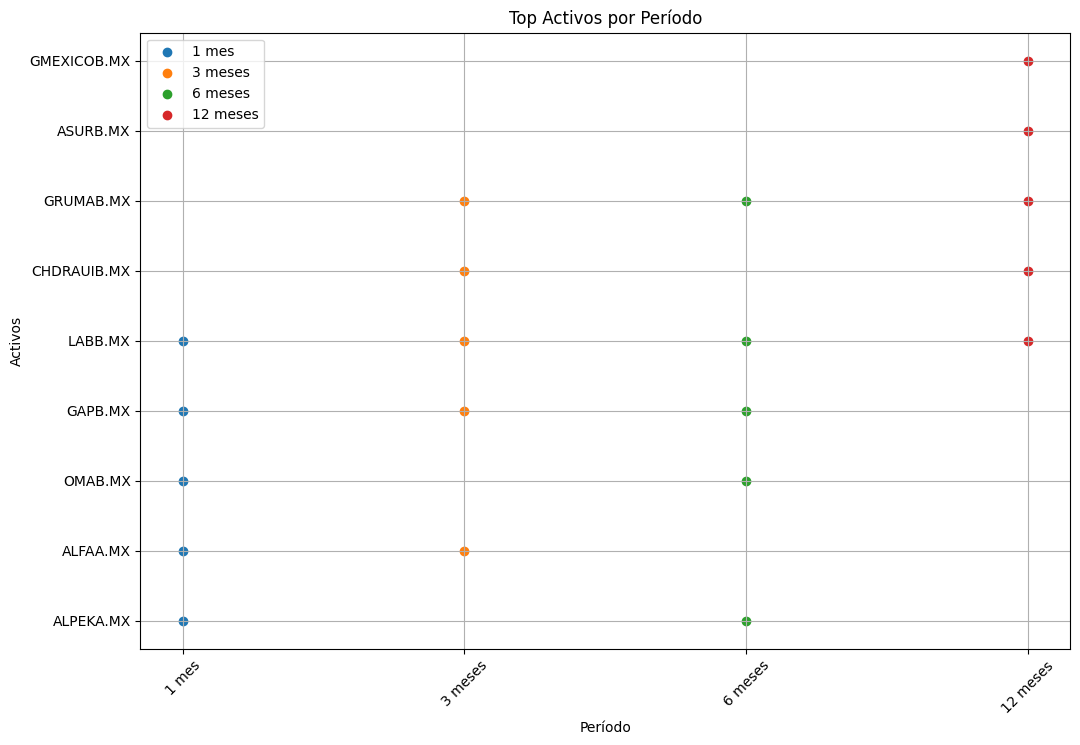

In [ ]:
def momentum_strategy_by_period(period_days, returns_df, top_n=5):
    # Filtrar los últimos period_days días de datos
    recent_returns = returns_df.tail(period_days).mean()

    # Ordenar los activos por rendimiento
    sorted_assets = recent_returns.sort_values(ascending=False)

    # Comprar los top_n activos
    top_assets = sorted_assets.head(top_n).index
    return top_assets

# Períodos de análisis
periods = {
    "1 mes": 21,   # Aproximadamente 21 días de trading en un mes
    "3 meses": 63, # Aproximadamente 63 días de trading en 3 meses
    "6 meses": 126, # Aproximadamente 126 días de trading en 6 meses
    "12 meses": 252 # Aproximadamente 252 días de trading en 12 meses
}

# Diccionario para almacenar los resultados
results = {period: momentum_strategy_by_period(days, returns_df) for period, days in periods.items()}

# Crear un DataFrame para almacenar las listas originales
original_lists_df = pd.DataFrame(results)

# Mostrar las listas originales
print("\nListas Originales de Top Activos para Cada Período:")
print(original_lists_df)

# Contar cuántas veces aparece cada activo en las listas de top activos
count_df = pd.DataFrame({period: pd.Series(assets).value_counts() for period, assets in results.items()}).fillna(0)
count_df = count_df.sum(axis=1)  # Sumar los conteos para obtener el total de apariciones

# Ordenar los activos por la puntuación total
sorted_count_df = count_df.sort_values(ascending=False)

# Mostrar los resultados de puntuación de interés
print("\nPuntuación de Interés de los Activos Basada en Apariciones en Listas de Top Activos:")
print(sorted_count_df)

# Mostrar los activos que aparecen en todas las listas
top_all_periods = sorted_count_df[sorted_count_df == len(periods)]
print("\nActivos que Aparecen en Todas las Listas:")
print(top_all_periods)

# Visualización
plt.figure(figsize=(12, 8))
for period, assets in results.items():
    plt.scatter([period] * len(assets), assets, label=period)
plt.xticks(rotation=45)
plt.xlabel('Período')
plt.ylabel('Activos')
plt.title('Top Activos por Período')
plt.legend()
plt.grid(True)
plt.show()

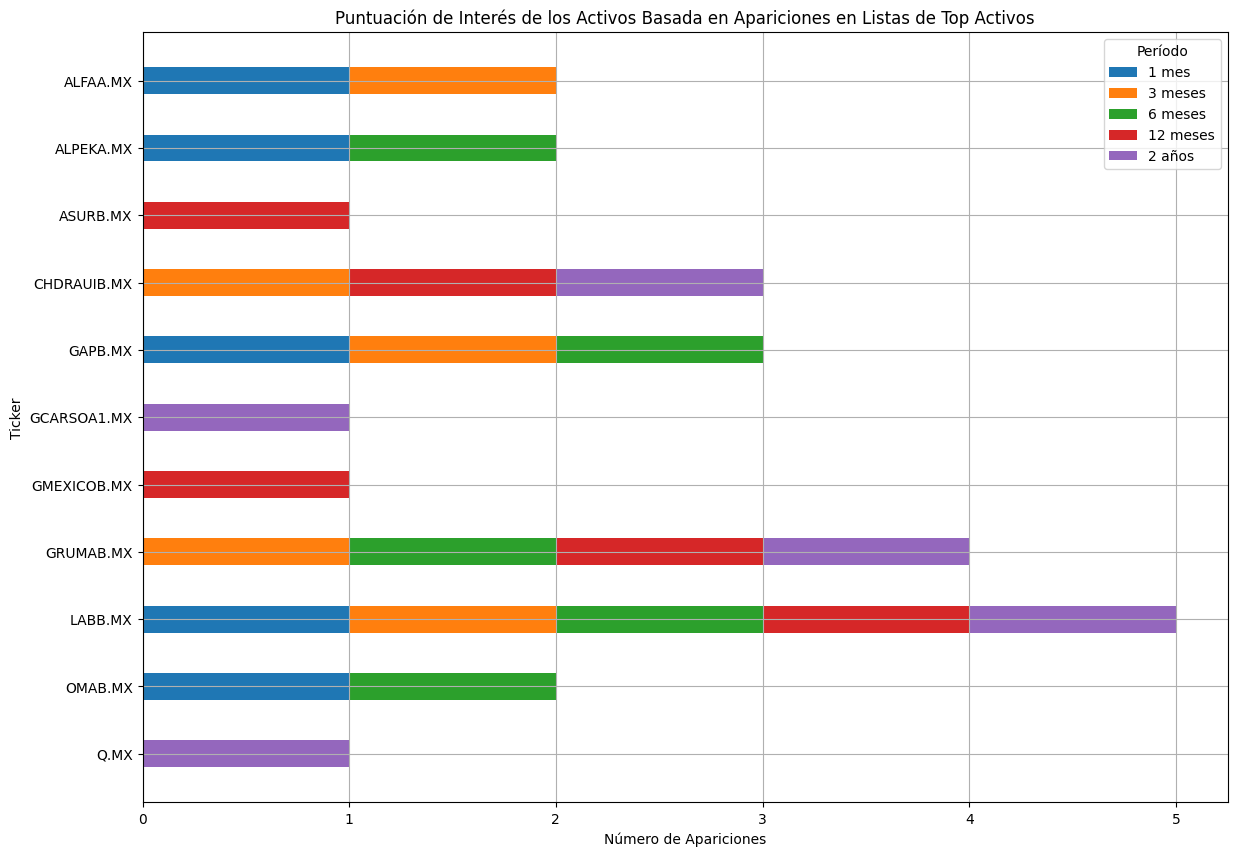

In [ ]:
# Función para la estrategia de momentum
def momentum_strategy_by_period(period_days, returns_df, top_n=5):
    recent_returns = returns_df.tail(period_days).mean()
    sorted_assets = recent_returns.sort_values(ascending=False)
    top_assets = sorted_assets.head(top_n).index
    return top_assets

# Períodos de análisis
periods = {
    "1 mes": 21,
    "3 meses": 63,
    "6 meses": 126,
    "12 meses": 252,
    "2 años": 504 # Dos años de datos de trading
}

# Aplicar la estrategia para cada período
results = {period: momentum_strategy_by_period(days, returns_df) for period, days in periods.items()}

# Crear un DataFrame para almacenar las listas originales
original_lists_df = pd.DataFrame(results)

# Contar cuántas veces aparece cada activo en las listas de top activos por período
count_df = pd.DataFrame({period: pd.Series(assets).value_counts() for period, assets in results.items()}).fillna(0)

# Visualización
plt.figure(figsize=(14, 10))

# Apilado de barras para cada período
bottoms = np.zeros(len(count_df))
for period in periods.keys():
    plt.barh(count_df.index, count_df[period], label=period, height=0.4, left=bottoms)
    bottoms += count_df[period]

plt.xlabel('Número de Apariciones')
plt.ylabel('Ticker')
plt.title('Puntuación de Interés de los Activos Basada en Apariciones en Listas de Top Activos')
plt.legend(title='Período')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
def calculate_cumulative_returns(returns_df):
    # Cálculo del rendimiento acumulado en porcentaje
    cumulative_returns_df = (returns_df + 1).cumprod() - 1
    return cumulative_returns_df

# Calcular los rendimientos acumulados
cumulative_returns_df = calculate_cumulative_returns(returns_df)

In [ ]:
# Crear gráfico interactivo
fig = go.Figure()

for ticker in cumulative_returns_df.columns:
    fig.add_trace(go.Scatter(x=cumulative_returns_df.index, y=cumulative_returns_df[ticker],
                             mode='lines', name=ticker))

fig.update_layout(title='Rendimiento Acumulado de Activos',
                  xaxis_title='Fecha',
                  yaxis_title='Rendimiento Acumulado',
                  legend_title='Activos')

fig.show()

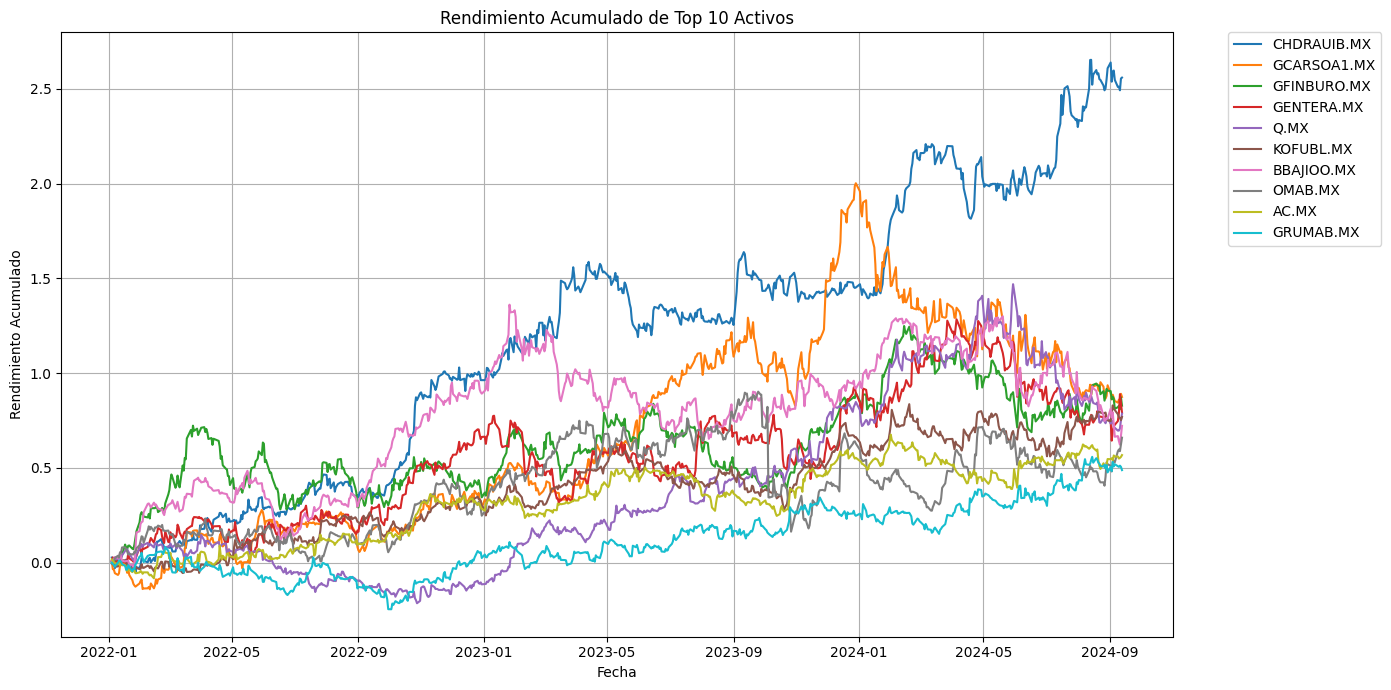

In [ ]:
# Filtrar top 10 activos con mayor rendimiento acumulado
top_assets = cumulative_returns_df.iloc[-1].nlargest(10).index

plt.figure(figsize=(14, 7))
for ticker in top_assets:
    plt.plot(cumulative_returns_df.index, cumulative_returns_df[ticker],
             label=ticker)

plt.xlabel('Fecha')
plt.ylabel('Rendimiento Acumulado')
plt.title('Rendimiento Acumulado de Top 10 Activos')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

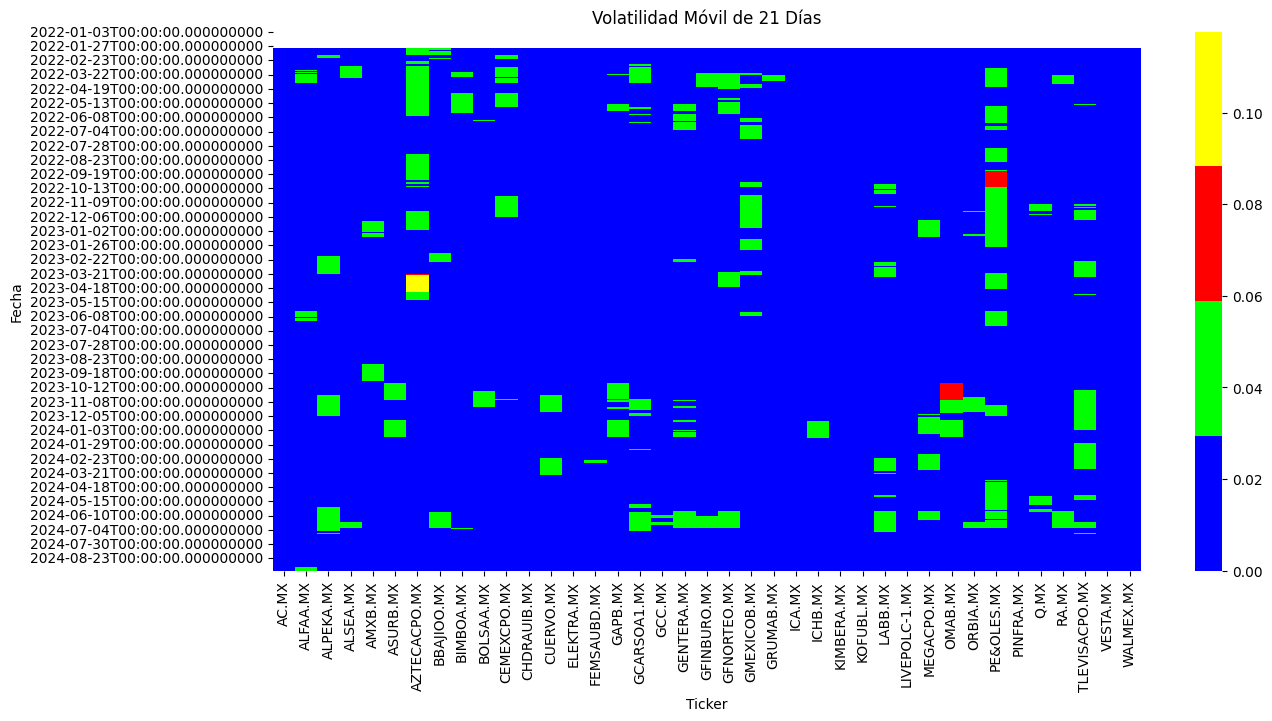

In [ ]:
import matplotlib.colors as mcolors

colors = mcolors.ListedColormap(['#0000FF', '#00FF00', '#FF0000', '#FFFF00'])
plt.figure(figsize=(14, 7))
sns.heatmap(returns_df.rolling(window=21).std(), cmap=colors, cbar=True)
plt.xlabel('Ticker')
plt.ylabel('Fecha')
plt.title('Volatilidad Móvil de 21 Días')
plt.show()

In [ ]:
def momentum_strategy_by_period(period_days, returns_df, top_n=5):
    # Filtrar los últimos period_days días de datos
    recent_returns = returns_df.tail(period_days).mean()

    # Ordenar los activos por rendimiento
    sorted_assets = recent_returns.sort_values(ascending=False)

    # Comprar los top_n activos
    top_assets = sorted_assets.head(top_n).index
    return top_assets

# Períodos de análisis
periods = {
    "1 mes": 21,   # Aproximadamente 21 días de trading en un mes
    "3 meses": 63, # Aproximadamente 63 días de trading en 3 meses
    "6 meses": 126, # Aproximadamente 126 días de trading en 6 meses
    "12 meses": 252 # Aproximadamente 252 días de trading en 12 meses
}

# Aplicar la estrategia para cada período
for period_name, days in periods.items():
    top_assets = momentum_strategy_by_period(days, returns_df)
    print(f"\nTop 5 Activos para Comprar Basados en Rendimiento en {period_name}:")
    print(top_assets)


Top 5 Activos para Comprar Basados en Rendimiento en 1 mes:
Index(['ALPEKA.MX', 'ALFAA.MX', 'OMAB.MX', 'GAPB.MX', 'LABB.MX'], dtype='object', name='Ticker')

Top 5 Activos para Comprar Basados en Rendimiento en 3 meses:
Index(['ALFAA.MX', 'LABB.MX', 'CHDRAUIB.MX', 'GAPB.MX', 'GRUMAB.MX'], dtype='object', name='Ticker')

Top 5 Activos para Comprar Basados en Rendimiento en 6 meses:
Index(['LABB.MX', 'GAPB.MX', 'OMAB.MX', 'GRUMAB.MX', 'ALPEKA.MX'], dtype='object', name='Ticker')

Top 5 Activos para Comprar Basados en Rendimiento en 12 meses:
Index(['LABB.MX', 'CHDRAUIB.MX', 'ASURB.MX', 'GMEXICOB.MX', 'GRUMAB.MX'], dtype='object', name='Ticker')


Rendimientos Absolutos

In [ ]:
def absolute_gain_strategy_by_period(period_days, absolute_returns_df, top_n=5):
    # Filtrar los últimos period_days días de datos
    recent_absolute_returns = absolute_returns_df.tail(period_days).mean()

    # Ordenar los activos por ganancia absoluta
    sorted_assets = recent_absolute_returns.sort_values(ascending=False)

    # Comprar los top_n activos
    top_assets = sorted_assets.head(top_n).index
    return top_assets

# Aplicar la estrategia para cada período
for period_name, days in periods.items():
    top_assets = absolute_gain_strategy_by_period(days, absolute_returns_df)
    print(f"\nTop 5 Activos para Comprar Basados en Ganancia Absoluta en {period_name}:")
    print(top_assets)


Top 5 Activos para Comprar Basados en Ganancia Absoluta en 1 mes:
Index(['GAPB.MX', 'OMAB.MX', 'ASURB.MX', 'ALPEKA.MX', 'ALFAA.MX'], dtype='object', name='Ticker')

Top 5 Activos para Comprar Basados en Ganancia Absoluta en 3 meses:
Index(['GAPB.MX', 'GRUMAB.MX', 'CHDRAUIB.MX', 'OMAB.MX', 'KOFUBL.MX'], dtype='object', name='Ticker')

Top 5 Activos para Comprar Basados en Ganancia Absoluta en 6 meses:
Index(['GAPB.MX', 'GRUMAB.MX', 'ASURB.MX', 'OMAB.MX', 'PE&OLES.MX'], dtype='object', name='Ticker')

Top 5 Activos para Comprar Basados en Ganancia Absoluta en 12 meses:
Index(['ASURB.MX', 'GRUMAB.MX', 'GAPB.MX', 'CHDRAUIB.MX', 'PE&OLES.MX'], dtype='object', name='Ticker')



Listas Originales de Top Activos para Cada Período (Rendimientos Absolutos):
       1 mes      3 meses     6 meses     12 meses
0    GAPB.MX      GAPB.MX     GAPB.MX     ASURB.MX
1    OMAB.MX    GRUMAB.MX   GRUMAB.MX    GRUMAB.MX
2   ASURB.MX  CHDRAUIB.MX    ASURB.MX      GAPB.MX
3  ALPEKA.MX      OMAB.MX     OMAB.MX  CHDRAUIB.MX
4   ALFAA.MX    KOFUBL.MX  PE&OLES.MX   PE&OLES.MX

Puntuación de Interés de los Activos Basada en Apariciones en Listas de Top Activos (Rendimientos Absolutos):
Ticker
GAPB.MX        4.0
ASURB.MX       3.0
GRUMAB.MX      3.0
OMAB.MX        3.0
CHDRAUIB.MX    2.0
PE&OLES.MX     2.0
ALFAA.MX       1.0
ALPEKA.MX      1.0
KOFUBL.MX      1.0
dtype: float64

Activos que Aparecen en Todas las Listas (Rendimientos Absolutos):
Ticker
GAPB.MX    4.0
dtype: float64


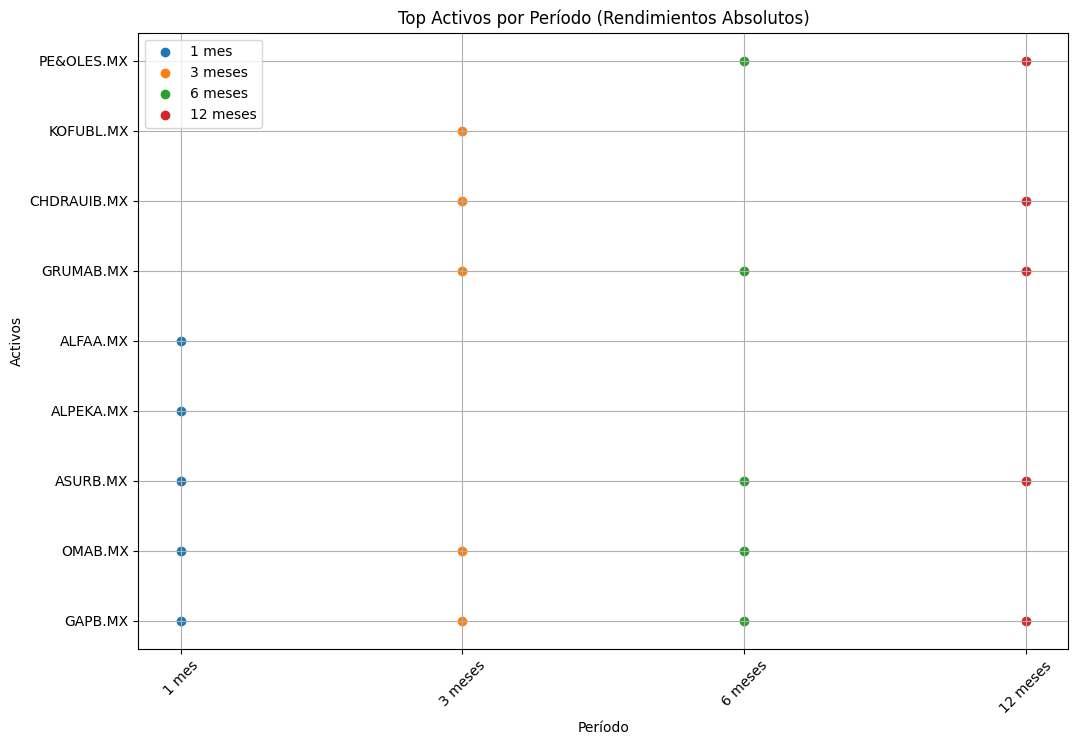

In [ ]:
def momentum_strategy_by_period_absoluto(period_days, absolute_returns_df, top_n=5):
    # Filtrar los últimos period_days días de datos
    recent_returns = absolute_returns_df.tail(period_days).sum()  # Sumar las ganancias absolutas en lugar de promediar

    # Ordenar los activos por rendimiento absoluto
    sorted_assets = recent_returns.sort_values(ascending=False)

    # Comprar los top_n activos
    top_assets = sorted_assets.head(top_n).index
    return top_assets

# Períodos de análisis
periods = {
    "1 mes": 21,   # Aproximadamente 21 días de trading en un mes
    "3 meses": 63, # Aproximadamente 63 días de trading en 3 meses
    "6 meses": 126, # Aproximadamente 126 días de trading en 6 meses
    "12 meses": 252 # Aproximadamente 252 días de trading en 12 meses
}

# Diccionario para almacenar los resultados basados en rendimientos absolutos
results_absoluto = {period: momentum_strategy_by_period_absoluto(days, absolute_returns_df) for period, days in periods.items()}

# Crear un DataFrame para almacenar las listas originales de rendimientos absolutos
original_lists_df_absoluto = pd.DataFrame(results_absoluto)

# Mostrar las listas originales de rendimientos absolutos
print("\nListas Originales de Top Activos para Cada Período (Rendimientos Absolutos):")
print(original_lists_df_absoluto)

# Contar cuántas veces aparece cada activo en las listas de top activos basados en rendimientos absolutos
count_df_absoluto = pd.DataFrame({period: pd.Series(assets).value_counts() for period, assets in results_absoluto.items()}).fillna(0)
count_df_absoluto = count_df_absoluto.sum(axis=1)  # Sumar los conteos para obtener el total de apariciones

# Ordenar los activos por la puntuación total de apariciones basadas en rendimientos absolutos
sorted_count_df_absoluto = count_df_absoluto.sort_values(ascending=False)

# Mostrar los resultados de puntuación de interés basados en rendimientos absolutos
print("\nPuntuación de Interés de los Activos Basada en Apariciones en Listas de Top Activos (Rendimientos Absolutos):")
print(sorted_count_df_absoluto)

# Mostrar los activos que aparecen en todas las listas de rendimientos absolutos
top_all_periods_absoluto = sorted_count_df_absoluto[sorted_count_df_absoluto == len(periods)]
print("\nActivos que Aparecen en Todas las Listas (Rendimientos Absolutos):")
print(top_all_periods_absoluto)

# Visualización para rendimientos absolutos
plt.figure(figsize=(12, 8))
for period, assets in results_absoluto.items():
    plt.scatter([period] * len(assets), assets, label=period)
plt.xticks(rotation=45)
plt.xlabel('Período')
plt.ylabel('Activos')
plt.title('Top Activos por Período (Rendimientos Absolutos)')
plt.legend()
plt.grid(True)
plt.show()


Listas Originales de Top Activos para Cada Período (Rendimientos Absolutos):
       1 mes      3 meses     6 meses     12 meses
0    GAPB.MX      GAPB.MX     GAPB.MX     ASURB.MX
1    OMAB.MX    GRUMAB.MX   GRUMAB.MX    GRUMAB.MX
2   ASURB.MX  CHDRAUIB.MX    ASURB.MX      GAPB.MX
3  ALPEKA.MX      OMAB.MX     OMAB.MX  CHDRAUIB.MX
4   ALFAA.MX    KOFUBL.MX  PE&OLES.MX   PE&OLES.MX

Puntuación de Interés de los Activos Basada en Apariciones en Listas de Top Activos (Rendimientos Absolutos):
Ticker
GAPB.MX        4.0
ASURB.MX       3.0
GRUMAB.MX      3.0
OMAB.MX        3.0
CHDRAUIB.MX    2.0
PE&OLES.MX     2.0
ALFAA.MX       1.0
ALPEKA.MX      1.0
KOFUBL.MX      1.0
dtype: float64

Activos que Aparecen en Todas las Listas (Rendimientos Absolutos):
Ticker
GAPB.MX    4.0
dtype: float64


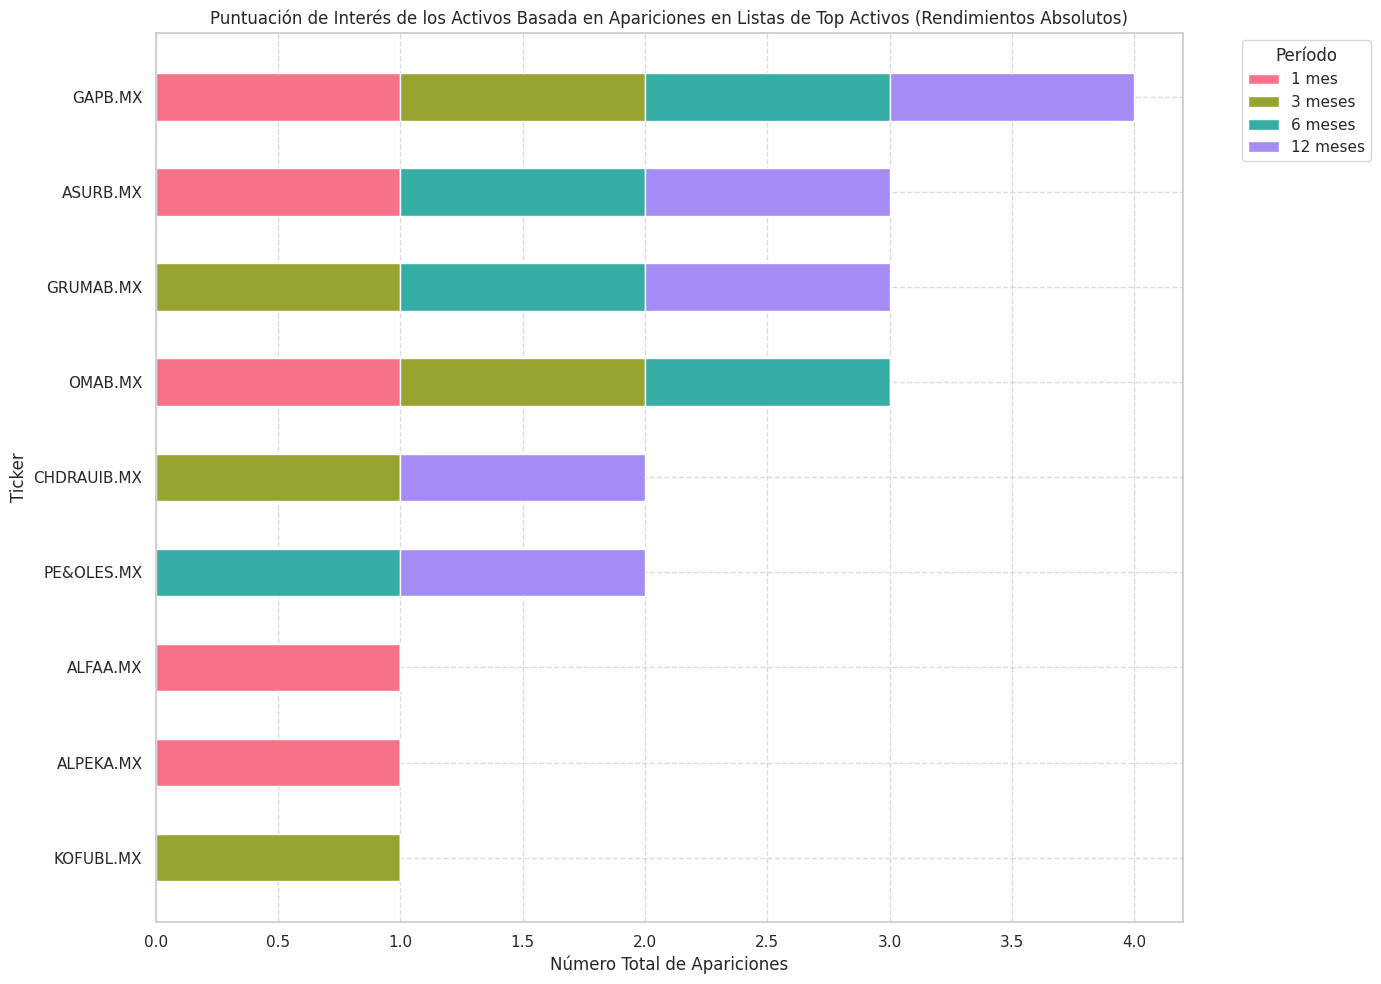

In [ ]:

# Función para la estrategia de momentum basada en rendimientos absolutos
def momentum_strategy_by_period_absoluto(period_days, absolute_returns_df, top_n=5):
    # Filtrar los últimos period_days días de datos
    recent_returns = absolute_returns_df.tail(period_days).sum()  # Sumar las ganancias absolutas en lugar de promediar

    # Ordenar los activos por rendimiento absoluto
    sorted_assets = recent_returns.sort_values(ascending=False)

    # Seleccionar los top_n activos
    top_assets = sorted_assets.head(top_n).index
    return top_assets

# Períodos de análisis
periods = {
    "1 mes": 21,
    "3 meses": 63,
    "6 meses": 126,
    "12 meses": 252
}

# Diccionario para almacenar los resultados basados en rendimientos absolutos
results_absoluto = {period: momentum_strategy_by_period_absoluto(days, absolute_returns_df) for period, days in periods.items()}

# Crear un DataFrame para almacenar las listas originales de rendimientos absolutos
original_lists_df_absoluto = pd.DataFrame(results_absoluto)

# Contar cuántas veces aparece cada activo en las listas de top activos basados en rendimientos absolutos
count_df_absoluto = pd.DataFrame({period: pd.Series(assets).value_counts() for period, assets in results_absoluto.items()}).fillna(0)

# Sumar los conteos para obtener el total de apariciones
count_df_absoluto = count_df_absoluto.sum(axis=1)

# Ordenar los activos por la puntuación total de apariciones basadas en rendimientos absolutos
sorted_count_df_absoluto = count_df_absoluto.sort_values(ascending=False)

# Mostrar las listas originales de rendimientos absolutos
print("\nListas Originales de Top Activos para Cada Período (Rendimientos Absolutos):")
print(original_lists_df_absoluto)

# Mostrar los resultados de puntuación de interés basados en rendimientos absolutos
print("\nPuntuación de Interés de los Activos Basada en Apariciones en Listas de Top Activos (Rendimientos Absolutos):")
print(sorted_count_df_absoluto)

# Mostrar los activos que aparecen en todas las listas de rendimientos absolutos
top_all_periods_absoluto = sorted_count_df_absoluto[sorted_count_df_absoluto == len(periods)]
print("\nActivos que Aparecen en Todas las Listas (Rendimientos Absolutos):")
print(top_all_periods_absoluto)

# Mejora de la visualización para rendimientos absolutos
plt.figure(figsize=(14, 10))

# Utilizar un estilo más atractivo
sns.set(style="whitegrid")

# Crear gráfico de barras apiladas
bottoms = np.zeros(len(sorted_count_df_absoluto))
colors = sns.color_palette("husl", len(periods))

for i, (period, color) in enumerate(zip(periods.keys(), colors)):
    # Verificar si el período tiene datos en count_df_absoluto
    period_assets = pd.Series(results_absoluto[period])
    period_counts = period_assets.value_counts().reindex(sorted_count_df_absoluto.index, fill_value=0)

    plt.barh(sorted_count_df_absoluto.index, period_counts,
             label=period, color=color, height=0.5, left=bottoms)
    bottoms += period_counts

# Añadir detalles estéticos
plt.xlabel('Número Total de Apariciones')
plt.ylabel('Ticker')
plt.title('Puntuación de Interés de los Activos Basada en Apariciones en Listas de Top Activos (Rendimientos Absolutos)')
plt.legend(title='Período', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
#Supongamos que cumulative_returns_df es el DataFrame con los rendimientos acumulados en formato decimal
# Y initial_capital es el capital inicial, por ejemplo, $1,000
initial_capital = 1000

# Función para calcular valores monetarios acumulados
def calculate_cumulative_values_from_decimal_returns(returns_df, initial_capital):
    # Convertir rendimientos acumulados en formato decimal a valores monetarios
    # (Los valores en returns_df ya representan el rendimiento acumulado en formato decimal)
    cumulative_values_df = (returns_df + 1) * initial_capital
    return cumulative_values_df

# Calcular los valores monetarios acumulados
cumulative_values_df = calculate_cumulative_values_from_decimal_returns(cumulative_returns_df, initial_capital)

# Crear gráfico interactivo para valores monetarios acumulados
fig = go.Figure()

for ticker in cumulative_values_df.columns:
    fig.add_trace(go.Scatter(x=cumulative_values_df.index, y=cumulative_values_df[ticker],
                             mode='lines', name=ticker))

fig.update_layout(title='Valor Monetario Acumulado de Activos',
                  xaxis_title='Fecha',
                  yaxis_title='Valor Monetario Acumulado',
                  legend_title='Activos')

fig.show()

Estrategias Basadas en Volatilidad
Estrategia de Minimización de Riesgo:

    Concepto: Compra activos con menor volatilidad (desviación estándar) y evita activos con alta volatilidad.
    Implementación:
        Compra: Activos con la menor volatilidad histórica.
        Venta: Activos con mayor volatilidad.

In [ ]:
# Calcular la volatilidad histórica
volatility_df = returns_df.rolling(window=30).std().mean()

# Estrategia de Minimización de Riesgo: Compra los activos con menor volatilidad
def volatility_strategy(volatility_df):
    # Ordenar los activos por volatilidad
    sorted_assets = volatility_df.sort_values()

    # Comprar los 5 activos con menor volatilidad
    low_volatility_assets = sorted_assets.head(5).index
    print(f"\nTop 5 Activos con Menor Volatilidad para Comprar:")
    print(low_volatility_assets)

# Aplicar la estrategia
volatility_strategy(volatility_df)


Top 5 Activos con Menor Volatilidad para Comprar:
Index(['ICA.MX', 'ELEKTRA.MX', 'ICHB.MX', 'AMXB.MX', 'LIVEPOLC-1.MX'], dtype='object', name='Ticker')


In [ ]:
def high_volatility_strategy(volatility_df, top_n=5):
    # Ordenar los activos por volatilidad (mayor volatilidad primero)
    sorted_assets = volatility_df.sort_values(ascending=False)

    # Seleccionar los top_n activos con mayor volatilidad
    high_volatility_assets = sorted_assets.head(top_n).index
    return high_volatility_assets

# Aplicar la estrategia
high_volatility_assets = high_volatility_strategy(volatility_df)
print(f"\nTop 5 Activos con Mayor Volatilidad para Evitar o Comprar:")
print(high_volatility_assets)


Top 5 Activos con Mayor Volatilidad para Evitar o Comprar:
Index(['PE&OLES.MX', 'TLEVISACPO.MX', 'GMEXICOB.MX', 'GCARSOA1.MX',
       'GENTERA.MX'],
      dtype='object', name='Ticker')


In [ ]:
# Calcular el rendimiento promedio diario
daily_avg_return = returns_df.mean()

# Calcular el rendimiento promedio mensual
monthly_avg_return = returns_df.resample('M').apply(lambda x: (1 + x).prod() - 1).mean()

# Calcular el rendimiento promedio anual
annual_avg_return = returns_df.resample('Y').apply(lambda x: (1 + x).prod() - 1).mean()

# Mostrar los resultados Top 5
print("Top 5 Rendimiento Promedio Diario por Ticker:")
print(daily_avg_return.nlargest(5))

print("\nTop 5 Rendimiento Promedio Mensual por Ticker:")
print(monthly_avg_return.nlargest(5))

print("\nTop 5 Rendimiento Promedio Anual por Ticker:")
print(annual_avg_return.nlargest(5))

Top 5 Rendimiento Promedio Diario por Ticker:
Ticker
CHDRAUIB.MX    0.002000
GCARSOA1.MX    0.001185
GENTERA.MX     0.001115
GFINBURO.MX    0.001105
Q.MX           0.001017
dtype: float64

Top 5 Rendimiento Promedio Mensual por Ticker:
Ticker
CHDRAUIB.MX    0.042320
GCARSOA1.MX    0.025745
GFINBURO.MX    0.024991
BBAJIOO.MX     0.021126
GENTERA.MX     0.020968
dtype: float64

Top 5 Rendimiento Promedio Anual por Ticker:
Ticker
CHDRAUIB.MX    0.554548
GCARSOA1.MX    0.413705
Q.MX           0.312681
BBAJIOO.MX     0.267911
GENTERA.MX     0.249498
dtype: float64


In [ ]:
# Calcular las diferencias absolutas en precios ajustados (ganancias absolutas)
absolute_returns_df = adj_close_df.diff()

# Calcular la ganancia promedio diaria
daily_avg_absolute_return = absolute_returns_df.mean()

# Calcular la ganancia promedio mensual
monthly_avg_absolute_return = absolute_returns_df.resample('M').sum().mean()

# Calcular la ganancia promedio anual
annual_avg_absolute_return = absolute_returns_df.resample('Y').sum().mean()

# Formatear y mostrar los resultados con el símbolo de moneda "$MXN"
print("Top 5 Ganancia Promedio Diaria por Ticker:")
print(daily_avg_absolute_return.nlargest(5).apply(lambda x: f"${x:,.2f} MXN"))

print("\nTop 5 Ganancia Promedio Mensual por Ticker:")
print(monthly_avg_absolute_return.nlargest(5).apply(lambda x: f"${x:,.2f} MXN"))

print("\nTop 5 Ganancia Promedio Anual por Ticker:")
print(annual_avg_absolute_return.nlargest(5).apply(lambda x: f"${x:,.2f} MXN"))

Top 5 Ganancia Promedio Diaria por Ticker:
Ticker
ASURB.MX       $0.25 MXN
GRUMAB.MX      $0.18 MXN
CHDRAUIB.MX    $0.16 MXN
GAPB.MX        $0.13 MXN
KOFUBL.MX      $0.11 MXN
dtype: object

Top 5 Ganancia Promedio Mensual por Ticker:
Ticker
ASURB.MX       $5.12 MXN
GRUMAB.MX      $3.64 MXN
CHDRAUIB.MX    $3.22 MXN
GAPB.MX        $2.67 MXN
KOFUBL.MX      $2.22 MXN
dtype: object

Top 5 Ganancia Promedio Anual por Ticker:
Ticker
ASURB.MX       $56.28 MXN
GRUMAB.MX      $39.99 MXN
CHDRAUIB.MX    $35.42 MXN
GAPB.MX        $29.33 MXN
KOFUBL.MX      $24.38 MXN
dtype: object


In [ ]:
# Calcular rendimientos porcentuales
returns_df = adj_close_df.pct_change()

# Calcular diferencias absolutas
absolute_returns_df = adj_close_df.diff()

# Calcular rendimientos porcentuales promedio diario
daily_avg_return_pct = returns_df.mean()

# Calcular ganancias absolutas promedio diaria
daily_avg_absolute_return = absolute_returns_df.mean()

# Mostrar las diferencias
print("Top 5 Rendimiento Promedio Diario por Ticker (Porcentual):")
print(daily_avg_return_pct.nlargest(5))

print("\nTop 5 Ganancia Promedio Diaria por Ticker (Absoluto) MXN:")
print(daily_avg_absolute_return.nlargest(5))

# Comparar con formato
def format_currency(x):
    if x > 0:
        return f"${x:,.2f} MXN"  # Ganancia
    else:
        return f"-${abs(x):,.2f} MXN"  # Pérdida

print("\nGanancia/Pérdida Promedio Diaria Formateada (Absoluto):")
print(daily_avg_absolute_return.apply(format_currency))

Top 5 Rendimiento Promedio Diario por Ticker (Porcentual):
Ticker
CHDRAUIB.MX    0.002000
GCARSOA1.MX    0.001185
GENTERA.MX     0.001115
GFINBURO.MX    0.001105
Q.MX           0.001017
dtype: float64

Top 5 Ganancia Promedio Diaria por Ticker (Absoluto) MXN:
Ticker
ASURB.MX       0.247915
GRUMAB.MX      0.176174
CHDRAUIB.MX    0.156038
GAPB.MX        0.129215
KOFUBL.MX      0.107397
dtype: float64

Ganancia/Pérdida Promedio Diaria Formateada (Absoluto):
Ticker
AC.MX             $0.10 MXN
ALFAA.MX         -$0.00 MXN
ALPEKA.MX        -$0.01 MXN
ALSEA.MX          $0.02 MXN
AMXB.MX          -$0.00 MXN
ASURB.MX          $0.25 MXN
AZTECACPO.MX     -$0.00 MXN
BBAJIOO.MX        $0.03 MXN
BIMBOA.MX         $0.01 MXN
BOLSAA.MX        -$0.00 MXN
CEMEXCPO.MX      -$0.00 MXN
CHDRAUIB.MX       $0.16 MXN
CUERVO.MX        -$0.03 MXN
ELEKTRA.MX       -$0.73 MXN
FEMSAUBD.MX       $0.08 MXN
GAPB.MX           $0.13 MXN
GCARSOA1.MX       $0.08 MXN
GCC.MX           -$0.01 MXN
GENTERA.MX        $0.01 MXN
GF

    Rendimiento Promedio Diario: El método mean() se utiliza para calcular el rendimiento promedio diario de cada ticker.

    Rendimiento Promedio Mensual: Utilizamos resample('M') para agrupar los datos por mes. La función lambda apply(lambda x: (1 + x).prod() - 1) se utiliza para calcular el rendimiento mensual compuesto.

    Rendimiento Promedio Anual: Similar al caso mensual, utilizamos resample('Y') para agrupar los datos por año y calcular el rendimiento anual compuesto.

    Identificación del Mejor Rendimiento: Se usa .idxmax() para identificar el ticker con el mejor rendimiento en cada escala temporal.

In [ ]:
# Calcular los rendimientos logarítmicos a partir de los precios ajustados
log_returns_df = np.log(adj_close_df / adj_close_df.shift(1))

# Mostrar las primeras filas de los rendimientos logarítmicos
print("Rendimientos Logarítmicos:")
print(log_returns_df.head())


Rendimientos Logarítmicos:
Ticker                        AC.MX  ALFAA.MX  ALPEKA.MX  ALSEA.MX   AMXB.MX  \
Date                                                                           
2022-01-03 00:00:00+00:00       NaN       NaN        NaN       NaN       NaN   
2022-01-04 00:00:00+00:00  0.018120 -0.005242  -0.007628  0.026925  0.004640   
2022-01-05 00:00:00+00:00 -0.008595 -0.033403  -0.009050  0.020982  0.000000   
2022-01-06 00:00:00+00:00 -0.007815  0.006771  -0.013730 -0.002868 -0.000926   
2022-01-07 00:00:00+00:00 -0.002567 -0.018387  -0.001845  0.034117 -0.022968   

Ticker                     ASURB.MX  AZTECACPO.MX  BBAJIOO.MX  BIMBOA.MX  \
Date                                                                       
2022-01-03 00:00:00+00:00       NaN           NaN         NaN        NaN   
2022-01-04 00:00:00+00:00  0.003877     -0.008889    0.009669   0.007019   
2022-01-05 00:00:00+00:00  0.006843     -0.018018   -0.010983  -0.030995   
2022-01-06 00:00:00+00:00  0.018

In [ ]:
# Calcular el rendimiento logarítmico promedio diario
log_daily_avg_return = log_returns_df.mean()

# Calcular el rendimiento logarítmico promedio mensual
log_monthly_avg_return = log_returns_df.resample('M').sum().mean()

# Calcular el rendimiento logarítmico promedio anual
log_annual_avg_return = log_returns_df.resample('Y').sum().mean()

# Mostrar los Top 5 rendimientos logarítmicos
print("Top 5 Rendimiento Logarítmico Promedio Diario por Ticker:")
print(log_daily_avg_return.nlargest(5))

print("\nTop 5 Rendimiento Logarítmico Promedio Mensual por Ticker:")
print(log_monthly_avg_return.nlargest(5))

print("\nTop 5 Rendimiento Logarítmico Promedio Anual por Ticker:")
print(log_annual_avg_return.nlargest(5))

Top 5 Rendimiento Logarítmico Promedio Diario por Ticker:
Ticker
CHDRAUIB.MX    0.001864
GCARSOA1.MX    0.000923
GFINBURO.MX    0.000886
GENTERA.MX     0.000856
Q.MX           0.000852
dtype: float64

Top 5 Rendimiento Logarítmico Promedio Mensual por Ticker:
Ticker
CHDRAUIB.MX    0.038467
GCARSOA1.MX    0.019044
GFINBURO.MX    0.018292
GENTERA.MX     0.017674
Q.MX           0.017581
dtype: float64

Top 5 Rendimiento Logarítmico Promedio Anual por Ticker:
Ticker
CHDRAUIB.MX    0.423138
GCARSOA1.MX    0.209483
GFINBURO.MX    0.201217
GENTERA.MX     0.194413
Q.MX           0.193392
dtype: float64


Rendimiento Porcentual: Te muestra el crecimiento bruto, que puede estar influenciado por eventos excepcionales o fluctuaciones extremas.
Rendimiento Logarítmico: Proporciona una visión más refinada y estable del crecimiento, representando mejor el retorno compuesto a lo largo del tiempo y eliminando el impacto de grandes variaciones de precios en un solo periodo.

In [ ]:
# Calcular la matriz de correlación entre los rendimientos de los tickers
correlation_matrix = returns_df.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

Matriz de Correlación:
Ticker            AC.MX  ALFAA.MX  ALPEKA.MX  ALSEA.MX   AMXB.MX  ASURB.MX  \
Ticker                                                                       
AC.MX          1.000000  0.128908   0.092107  0.117256  0.089871  0.219579   
ALFAA.MX       0.128908  1.000000   0.266076  0.127456  0.033507  0.233739   
ALPEKA.MX      0.092107  0.266076   1.000000  0.148156  0.085574  0.147684   
ALSEA.MX       0.117256  0.127456   0.148156  1.000000  0.069759  0.270977   
AMXB.MX        0.089871  0.033507   0.085574  0.069759  1.000000  0.107433   
ASURB.MX       0.219579  0.233739   0.147684  0.270977  0.107433  1.000000   
AZTECACPO.MX  -0.003844  0.032848   0.034504  0.081192 -0.021330  0.033065   
BBAJIOO.MX     0.165861  0.207048   0.141104  0.267314  0.068070  0.209839   
BIMBOA.MX      0.238803  0.255170   0.200438  0.149773  0.056128  0.204821   
BOLSAA.MX      0.112380  0.174838   0.159738  0.266218  0.117202  0.251280   
CEMEXCPO.MX    0.215651  0.280676   0.177

In [ ]:
# Calcular el volumen promedio para cada ticker
average_volume = volume_df.mean()

# Mostrar el volumen promedio de cada ticker
print("Volumen Promedio de Cada Ticker:")
print(average_volume)

Volumen Promedio de Cada Ticker:
Ticker
AC.MX            1.760617e+06
ALFAA.MX         7.170446e+06
ALPEKA.MX        1.521970e+06
ALSEA.MX         1.749657e+06
AMXB.MX          2.976479e+07
ASURB.MX         4.828452e+05
AZTECACPO.MX     1.473897e+05
BBAJIOO.MX       2.379942e+06
BIMBOA.MX        2.383109e+06
BOLSAA.MX        1.339297e+06
CEMEXCPO.MX      3.972650e+07
CHDRAUIB.MX      5.726099e+05
CUERVO.MX        1.937915e+06
ELEKTRA.MX       5.363089e+04
FEMSAUBD.MX      2.798377e+06
GAPB.MX          1.087209e+06
GCARSOA1.MX      4.729824e+05
GCC.MX           3.758011e+05
GENTERA.MX       3.384264e+06
GFINBURO.MX      2.192028e+06
GFNORTEO.MX      6.733354e+06
GMEXICOB.MX      6.033937e+06
GRUMAB.MX        5.233124e+05
ICA.MX           0.000000e+00
ICHB.MX          9.369924e+03
KIMBERA.MX       5.007488e+06
KOFUBL.MX        6.733300e+05
LABB.MX          3.386136e+06
LIVEPOLC-1.MX    4.616896e+05
MEGACPO.MX       1.215031e+06
OMAB.MX          9.586178e+05
ORBIA.MX         2.435940e+06


In [ ]:
top_volume = average_volume.nlargest(10)

In [ ]:
top_volume

Ticker
CEMEXCPO.MX      3.972650e+07
AMXB.MX          2.976479e+07
WALMEX.MX        1.594475e+07
ALFAA.MX         7.170446e+06
GFNORTEO.MX      6.733354e+06
GMEXICOB.MX      6.033937e+06
KIMBERA.MX       5.007488e+06
TLEVISACPO.MX    4.683114e+06
LABB.MX          3.386136e+06
GENTERA.MX       3.384264e+06
dtype: float64

In [ ]:
# Calcular la matriz de correlación de los rendimientos logarítmicos
log_correlation_matrix = log_returns_df.corr()

# Mostrar la matriz de correlación de rendimientos logarítmicos
print("Matriz de Correlación de Rendimientos Logarítmicos:")
print(log_correlation_matrix)

Matriz de Correlación de Rendimientos Logarítmicos:
Ticker            AC.MX  ALFAA.MX  ALPEKA.MX  ALSEA.MX   AMXB.MX  ASURB.MX  \
Ticker                                                                       
AC.MX          1.000000  0.132904   0.091922  0.119463  0.091628  0.223109   
ALFAA.MX       0.132904  1.000000   0.267049  0.132372  0.033086  0.237577   
ALPEKA.MX      0.091922  0.267049   1.000000  0.148085  0.081901  0.146839   
ALSEA.MX       0.119463  0.132372   0.148085  1.000000  0.067989  0.276333   
AMXB.MX        0.091628  0.033086   0.081901  0.067989  1.000000  0.101973   
ASURB.MX       0.223109  0.237577   0.146839  0.276333  0.101973  1.000000   
AZTECACPO.MX  -0.006700  0.035226   0.043205  0.082582 -0.020346  0.030338   
BBAJIOO.MX     0.171005  0.213175   0.143002  0.272168  0.068189  0.218635   
BIMBOA.MX      0.239727  0.260228   0.196357  0.149609  0.054618  0.209498   
BOLSAA.MX      0.111951  0.174145   0.158094  0.268188  0.115167  0.249730   
CEMEXCPO.MX 

In [ ]:
# Calcular el rendimiento medio diario y la volatilidad diaria
mean_daily_return = returns_df.mean()
volatility_daily = returns_df.std()

# Calcular el máximo y mínimo rendimiento diario
max_daily_return = returns_df.max()
min_daily_return = returns_df.min()

print("Rendimiento Medio Diario:")
print(mean_daily_return)

print("Volatilidad Diaria:")
print(volatility_daily)

print("Máximos y Mínimos Rendimientos Diarios:")
print("Máximos:", max_daily_return)
print("Mínimos:", min_daily_return)

Rendimiento Medio Diario:
Ticker
AC.MX            7.671777e-04
ALFAA.MX         1.181457e-04
ALPEKA.MX       -4.398068e-04
ALSEA.MX         6.069387e-04
AMXB.MX         -1.167392e-04
ASURB.MX         7.558947e-04
AZTECACPO.MX    -7.610208e-04
BBAJIOO.MX       9.904821e-04
BIMBOA.MX        4.006440e-04
BOLSAA.MX        4.723109e-05
CEMEXCPO.MX     -3.307381e-06
CHDRAUIB.MX      2.000084e-03
CUERVO.MX       -4.834499e-04
ELEKTRA.MX      -5.412075e-04
FEMSAUBD.MX      5.925837e-04
GAPB.MX          7.267617e-04
GCARSOA1.MX      1.185047e-03
GCC.MX           9.966130e-05
GENTERA.MX       1.114875e-03
GFINBURO.MX      1.105011e-03
GFNORTEO.MX      6.347286e-04
GMEXICOB.MX      7.060171e-04
GRUMAB.MX        7.325122e-04
ICA.MX          -1.075688e-09
ICHB.MX          5.991252e-05
KIMBERA.MX       3.885360e-04
KOFUBL.MX        9.495071e-04
LABB.MX          4.225859e-04
LIVEPOLC-1.MX    6.349344e-04
MEGACPO.MX      -2.601902e-04
OMAB.MX          1.013774e-03
ORBIA.MX        -1.203405e-03
PE&OLES

In [ ]:
# Calcular la diferencia entre el volumen actual y el volumen promedio
current_volume = volume_df.iloc[-1]  # Volumen del día más reciente
volume_diff = current_volume - average_volume

print("Diferencia del Volumen Actual respecto al Volumen Promedio:")
print(volume_diff)

# Calcular la tendencia del volumen (promedio móvil de 7 días)
volume_trend = volume_df.rolling(window=7).mean()

print("Tendencia del Volumen (Promedio Móvil de 7 días):")
print(volume_trend.tail())

Diferencia del Volumen Actual respecto al Volumen Promedio:
Ticker
AC.MX           -6.889011e+05
ALFAA.MX        -1.012841e+06
ALPEKA.MX       -7.701557e+05
ALSEA.MX        -8.725815e+05
AMXB.MX          1.788744e+07
ASURB.MX        -3.146202e+05
AZTECACPO.MX    -1.473897e+05
BBAJIOO.MX      -1.065050e+06
BIMBOA.MX       -1.836448e+06
BOLSAA.MX       -9.736986e+05
CEMEXCPO.MX     -8.624500e+06
CHDRAUIB.MX      4.623807e+04
CUERVO.MX       -1.628304e+06
ELEKTRA.MX      -5.363089e+04
FEMSAUBD.MX     -1.795327e+06
GAPB.MX          4.247913e+05
GCARSOA1.MX     -2.710894e+05
GCC.MX           7.369355e+02
GENTERA.MX      -1.035094e+06
GFINBURO.MX     -1.842509e+06
GFNORTEO.MX     -9.163388e+05
GMEXICOB.MX     -2.772892e+06
GRUMAB.MX       -3.294294e+05
ICA.MX           0.000000e+00
ICHB.MX         -7.034924e+03
KIMBERA.MX       3.274435e+05
KOFUBL.MX       -5.133490e+05
LABB.MX         -6.815378e+05
LIVEPOLC-1.MX    1.995383e+03
MEGACPO.MX      -8.835341e+05
OMAB.MX          7.057252e+05
ORB

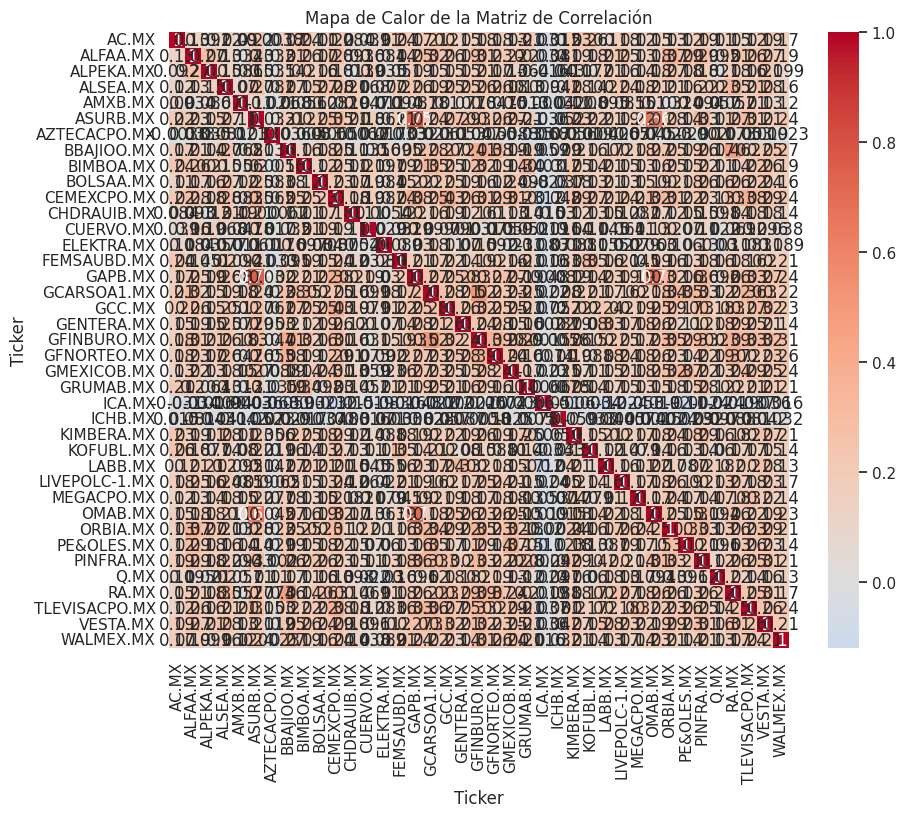

Correlaciones Fuertes:
Ticker         AC.MX  ALFAA.MX  ALPEKA.MX  ALSEA.MX  AMXB.MX  ASURB.MX  \
Ticker                                                                   
AC.MX            NaN       NaN        NaN       NaN      NaN       NaN   
ALFAA.MX         NaN       NaN        NaN       NaN      NaN       NaN   
ALPEKA.MX        NaN       NaN        NaN       NaN      NaN       NaN   
ALSEA.MX         NaN       NaN        NaN       NaN      NaN       NaN   
AMXB.MX          NaN       NaN        NaN       NaN      NaN       NaN   
ASURB.MX         NaN       NaN        NaN       NaN      NaN       NaN   
AZTECACPO.MX     NaN       NaN        NaN       NaN      NaN       NaN   
BBAJIOO.MX       NaN       NaN        NaN       NaN      NaN       NaN   
BIMBOA.MX        NaN       NaN        NaN       NaN      NaN       NaN   
BOLSAA.MX        NaN       NaN        NaN       NaN      NaN       NaN   
CEMEXCPO.MX      NaN       NaN        NaN       NaN      NaN       NaN   
CHDRAUIB.MX    

In [ ]:
# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Matriz de Correlación")
plt.show()

# Identificar correlaciones fuertes y débiles
threshold = 0.7  # Definir un umbral
strong_correlations = correlation_matrix[(correlation_matrix >= threshold) & (correlation_matrix != 1.0)]
weak_correlations = correlation_matrix[(correlation_matrix <= -threshold)]

print("Correlaciones Fuertes:")
print(strong_correlations)

print("Correlaciones Débiles:")
print(weak_correlations)

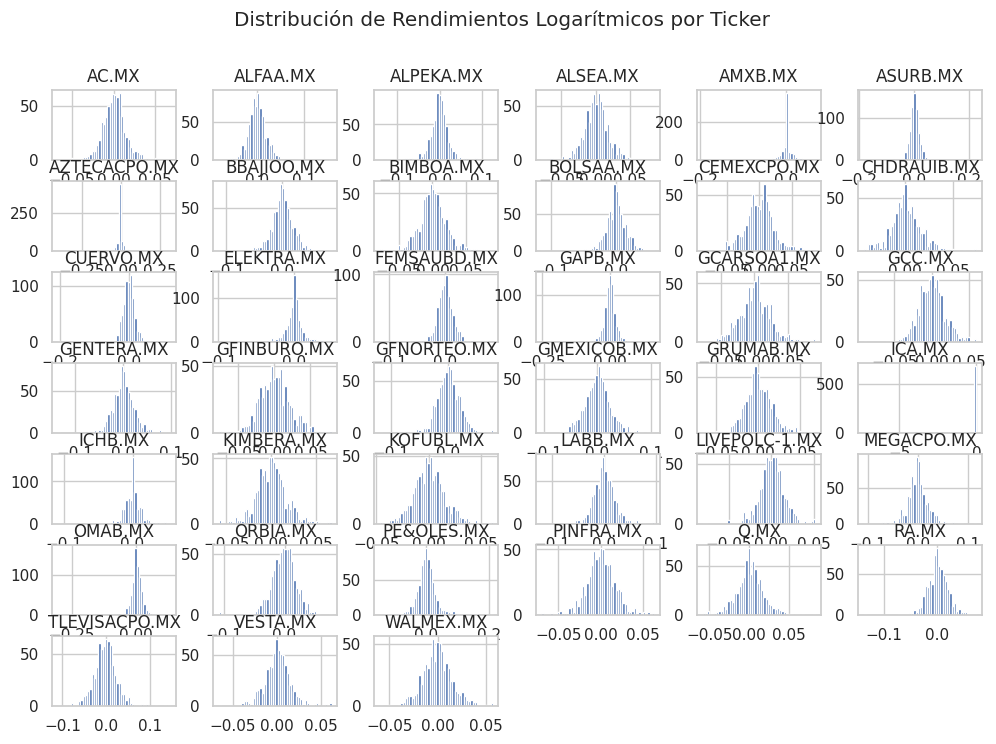

Volatilidad de Rendimientos Logarítmicos:
Ticker
AC.MX            1.458061e-02
ALFAA.MX         1.909913e-02
ALPEKA.MX        2.310767e-02
ALSEA.MX         1.825427e-02
AMXB.MX          1.536101e-02
ASURB.MX         2.024216e-02
AZTECACPO.MX     2.972727e-02
BBAJIOO.MX       1.960193e-02
BIMBOA.MX        2.015064e-02
BOLSAA.MX        1.598849e-02
CEMEXCPO.MX      2.239889e-02
CHDRAUIB.MX      1.636206e-02
CUERVO.MX        1.899092e-02
ELEKTRA.MX       1.249620e-02
FEMSAUBD.MX      1.519090e-02
GAPB.MX          2.377363e-02
GCARSOA1.MX      2.286728e-02
GCC.MX           1.806168e-02
GENTERA.MX       2.271939e-02
GFINBURO.MX      2.087680e-02
GFNORTEO.MX      2.049796e-02
GMEXICOB.MX      2.445046e-02
GRUMAB.MX        1.719303e-02
ICA.MX           2.807113e-08
ICHB.MX          1.404998e-02
KIMBERA.MX       1.694163e-02
KOFUBL.MX        1.491559e-02
LABB.MX          2.160532e-02
LIVEPOLC-1.MX    1.528095e-02
MEGACPO.MX       2.122204e-02
OMAB.MX          2.348648e-02
ORBIA.MX         1.99

In [ ]:
# Graficar la distribución de los rendimientos logarítmicos
log_returns_df.hist(bins=50, figsize=(12, 8))
plt.suptitle("Distribución de Rendimientos Logarítmicos por Ticker")
plt.show()

# Calcular la volatilidad de los rendimientos logarítmicos
log_volatility = log_returns_df.std()

print("Volatilidad de Rendimientos Logarítmicos:")
print(log_volatility)

Interpretación
1. Rendimiento Diario (0.053200)

    Cálculo: El rendimiento diario de 0.053200 o 5.32% indica que el activo, CEMEXCPO.MX, ha tenido un rendimiento promedio de aproximadamente 5.32% por día durante el periodo analizado.
    Interpretación: Un rendimiento diario positivo significa que, en promedio, el precio del activo ha aumentado. Un rendimiento del 5.32% es bastante alto para un rendimiento diario, lo que podría indicar una tendencia alcista fuerte o volatilidad significativa en los días analizados.

2. Volatilidad Diaria (0.022564)

    Cálculo: La volatilidad diaria de 0.022564 o 2.26% mide cuánto varían los rendimientos diarios del activo alrededor de su media.
    Interpretación: Una volatilidad del 2.26% indica que los rendimientos diarios del activo fluctúan en promedio en un rango del 2.26% alrededor de su rendimiento medio. Esto es relativamente bajo, lo que sugiere que el activo es menos arriesgado en comparación con otros activos con volatilidades más altas.

3. Volumen Promedio (39,343,250)

    Cálculo: El volumen promedio de 39,343,250 representa el número promedio de acciones negociadas diariamente.
    Interpretación: Un volumen promedio alto generalmente sugiere una buena liquidez, lo que facilita la compra y venta de acciones sin afectar significativamente el precio. En este caso, CEMEXCPO.MX tiene un volumen promedio bastante alto, indicando que el activo es bastante líquido.

4. Tendencia del Volumen (-30,682,980)

    Cálculo: La tendencia del volumen de -30,682,980 es la diferencia entre el volumen actual y el promedio.
    Interpretación: Un valor negativo de -30,682,980 indica que el volumen actual es significativamente menor que el volumen promedio. Esto puede sugerir que el interés en el activo ha disminuido recientemente. Una disminución en el volumen puede ser un signo de menor actividad en el mercado para ese activo o una disminución en el interés de los inversores.

Resumen

    Rendimiento 15 de agosto: CEMEXCPO.MX ha tenido un rendimiento diario positivo del 5.32%, lo cual es bastante alto.
    Volatilidad Diaria: La volatilidad es baja (2.26%), indicando menos riesgo en términos de variación diaria del rendimiento.
    Volumen Promedio: El volumen promedio de 39,343,250 sugiere que el activo es líquido y fácil de negociar.
    Tendencia del Volumen: La disminución en el volumen de -30,682,980 podría ser una señal de menor interés reciente en el activo.